In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import keras
import math
from keras.models import Sequential
from keras.layers import Dense
%matplotlib inline


In [2]:
df = pd.read_csv('Dataset.csv')

In [4]:
df1 = df.reset_index()['hourly_traffic_count']
df1 = df1.iloc[:9792,]

In [5]:
df1

0        3
1       16
2        9
3       12
4       19
        ..
9787    23
9788    25
9789    16
9790    18
9791    25
Name: hourly_traffic_count, Length: 9792, dtype: int64

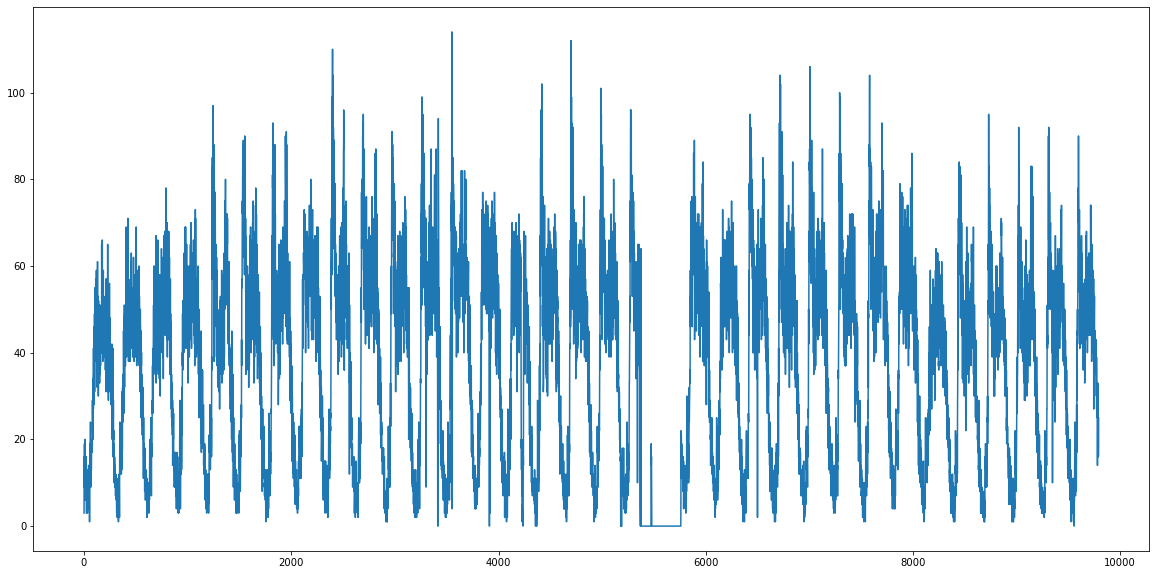

In [6]:
plt.figure(figsize=(20,10))
plt.plot(df1)
plt.show()

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [8]:
type(df1)

numpy.ndarray

In [9]:
def create_dataset(dataset, window=1):
    dataX, dataY= [], []
    for i in range(len(dataset)-window-1):
        a = dataset[i:(i+window),0]
        dataX.append(a)
        dataY.append(dataset[i+window,0])
    return np.array(dataX), np.array(dataY)

In [10]:
window = 288
X,y = create_dataset(df1,window)

In [13]:
X.shape, y.shape

((9503, 288), (9503,))

In [16]:
training_size = int(len(df1)*0.80)
test_size = len(df1)-training_size
X_train, X_test = X[0:training_size,:], X[training_size:,:]

In [18]:
X_train.shape , X_test.shape

((7833, 288), (1670, 288))

In [21]:
y_train, y_test = y[0:training_size,], y[training_size:,]

In [22]:
y_train.shape , y_test.shape

((7833,), (1670,))

# Model

In [23]:
model = Sequential()
model.add(Dense(40, input_dim=window, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))

In [24]:
opt  = keras.optimizers.Adagrad(learning_rate = 0.05)

In [25]:
model.compile(optimizer=opt ,loss='mean_squared_error')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                11560     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2050      
_________________________________________________________________
dense_2 (Dense)              (None, 40)                2040      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 41        
Total params: 15,691
Trainable params: 15,691
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=1)

Epoch 1/200
784/784 [==============================] - 1s 1ms/step - loss: 0.0084
Epoch 2/200
784/784 [==============================] - 1s 1ms/step - loss: 0.0061
Epoch 3/200
784/784 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 4/200
784/784 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 5/200
784/784 [==============================] - 1s 1ms/step - loss: 0.0052
Epoch 6/200
784/784 [==============================] - 1s 1ms/step - loss: 0.0051
Epoch 7/200
784/784 [==============================] - 1s 1ms/step - loss: 0.0050
Epoch 8/200
784/784 [==============================] - 1s 1ms/step - loss: 0.0049
Epoch 9/200
784/784 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 10/200
784/784 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 11/200
784/784 [==============================] - 1s 1ms/step - loss: 0.0047
Epoch 12/200
784/784 [==============================] - 1s 1ms/step - loss: 0.0047
Epoch 13/200


784/784 [==============================] - 1s 982us/step - loss: 0.0034
Epoch 99/200
784/784 [==============================] - 1s 992us/step - loss: 0.0034
Epoch 100/200
784/784 [==============================] - 1s 969us/step - loss: 0.0033
Epoch 101/200
784/784 [==============================] - 1s 997us/step - loss: 0.0033
Epoch 102/200
784/784 [==============================] - 1s 983us/step - loss: 0.0033
Epoch 103/200
784/784 [==============================] - 1s 1ms/step - loss: 0.0033
Epoch 104/200
784/784 [==============================] - 1s 1ms/step - loss: 0.0033
Epoch 105/200
784/784 [==============================] - 1s 968us/step - loss: 0.0033
Epoch 106/200
784/784 [==============================] - 1s 986us/step - loss: 0.0033
Epoch 107/200
784/784 [==============================] - 1s 985us/step - loss: 0.0032
Epoch 108/200
784/784 [==============================] - 1s 976us/step - loss: 0.0033
Epoch 109/200
784/784 [==============================] - 1s 986us/step - 

Epoch 195/200
784/784 [==============================] - 1s 1ms/step - loss: 0.0022
Epoch 196/200
784/784 [==============================] - 1s 1ms/step - loss: 0.0022
Epoch 197/200
784/784 [==============================] - 1s 1ms/step - loss: 0.0022
Epoch 198/200
784/784 [==============================] - 1s 1ms/step - loss: 0.0022
Epoch 199/200
784/784 [==============================] - 1s 1ms/step - loss: 0.0022
Epoch 200/200
784/784 [==============================] - 1s 1ms/step - loss: 0.0022


In [28]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [29]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [30]:
train_predict = train_predict.astype(int)
test_predict = test_predict.astype(int)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Evaluation

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
print('RMSE-train:',math.sqrt(mean_squared_error(y_train,train_predict)))
print('MAE-train:',mean_absolute_error(y_train,train_predict))
print('R_2-train:',r2_score(y_train,train_predict))

RMSE-train: 5.6908414128503155
MAE-train: 4.187029235286608
R_2-train: 0.9426582891168299


In [32]:
print('RMSE-test:',math.sqrt(mean_squared_error(y_test,test_predict)))
print('MAE-test:',mean_absolute_error(y_test,test_predict))
print('R_2-train:',r2_score(y_test,test_predict))

RMSE-test: 7.8978887499500035
MAE-test: 5.907185628742515
R_2-train: 0.8448345271710722


In [50]:
test_predict

array([[14],
       [14],
       [12],
       ...,
       [16],
       [15],
       [15]])

In [52]:
output = pd.DataFrame(data=test_predict, columns=["Predict"])
output

,Predict
0,14
1,14
2,12
3,20
4,14
...,...
1665,18
1666,17
1667,16
1668,15


In [55]:
actual = pd.DataFrame(data=y_test, columns=["Y"])
output['Y'] = actual['Y']
output

,Predict,Y
0,14,25
1,14,15
2,12,16
3,20,21
4,14,17
...,...,...
1665,18,26
1666,17,23
1667,16,25
1668,15,16


In [61]:
df1[-1670:,0].shape

(1670,)

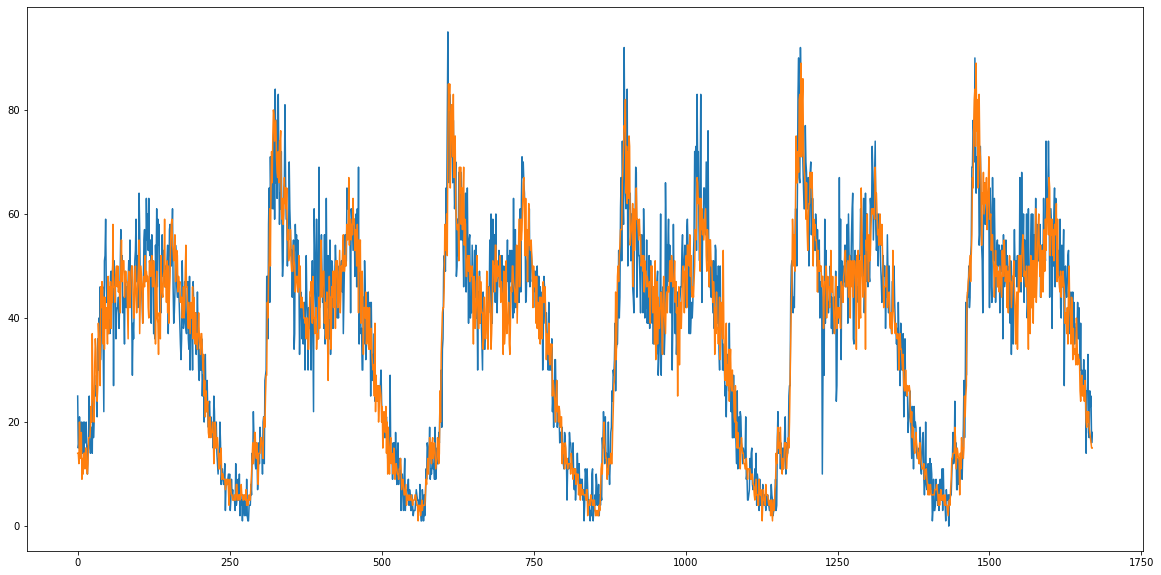

In [66]:
plt.figure(figsize=(20,10))
plt.plot(output['Y'])
plt.plot(output['Predict'])
plt.show()

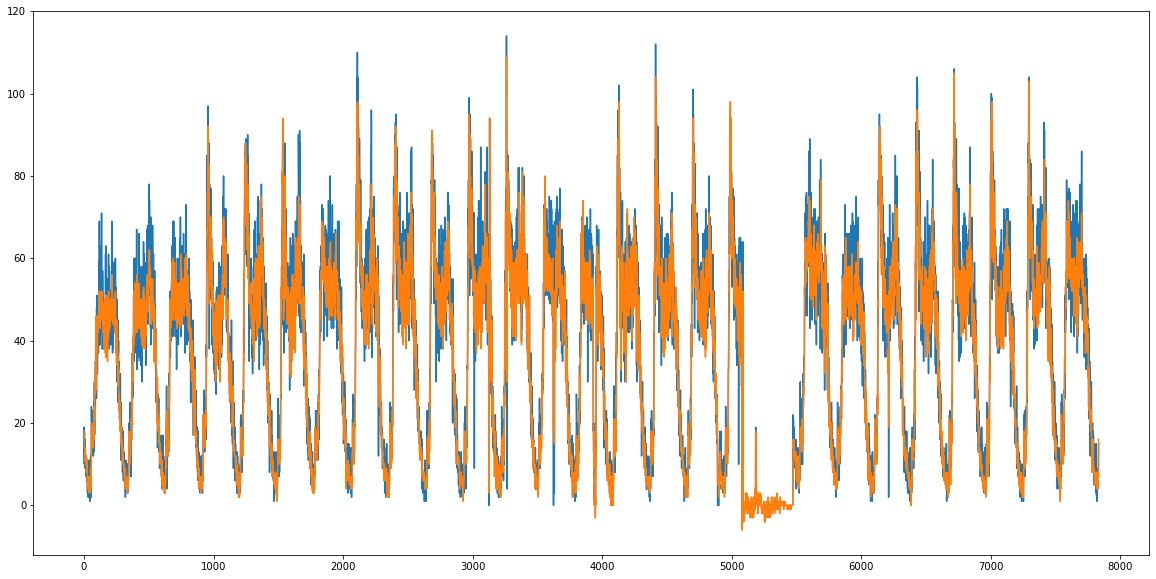

In [68]:
plt.figure(figsize=(20,10))
plt.plot(y_train)
plt.plot(train_predict)
plt.show()

In [69]:
df1.shape

(9792, 1)

In [72]:
train_predict.shape, y_train.shape

((7833, 1), (7833, 1))

In [73]:
test_predict.shape, y_test.shape

((1670, 1), (1670, 1))

In [92]:
y_train = scaler.fit_transform(y_train)

In [93]:
y_train

array([[0.11403509],
       [0.16666667],
       [0.0877193 ],
       ...,
       [0.07017544],
       [0.07894737],
       [0.13157895]])

In [99]:
X_train

array([[0.02631579, 0.14035088, 0.07894737, ..., 0.1754386 , 0.19298246,
        0.19298246],
       [0.14035088, 0.07894737, 0.10526316, ..., 0.19298246, 0.19298246,
        0.11403509],
       [0.07894737, 0.10526316, 0.16666667, ..., 0.19298246, 0.11403509,
        0.16666667],
       ...,
       [0.06140351, 0.10526316, 0.13157895, ..., 0.07017544, 0.04385965,
        0.03508772],
       [0.10526316, 0.13157895, 0.21929825, ..., 0.04385965, 0.03508772,
        0.07017544],
       [0.13157895, 0.21929825, 0.19298246, ..., 0.03508772, 0.07017544,
        0.07894737]])

# Hyper Parameter Tuning

In [94]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [95]:
def create_model():
    model = Sequential()
    model.add(Dense(40, input_dim=window, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(1))
    opt  = keras.optimizers.Adagrad(learning_rate = 0.05)
    model.compile(optimizer=opt,loss='mean_squared_error')
    return model

In [96]:
model = KerasClassifier(build_fn=create_model, verbose=1)

In [98]:
param_grid = dict(epochs=[100, 200, 500,1000,1500])
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5, scoring='neg_root_mean_squared_error')

In [100]:
grid_result = grid.fit(X_train, y_train)

Epoch 1/100
196/196 [==============================] - 0s 1ms/step - loss: 238.4797
Epoch 2/100
196/196 [==============================] - 0s 1ms/step - loss: 95.4040
Epoch 3/100
196/196 [==============================] - 0s 1ms/step - loss: 83.8175
Epoch 4/100
196/196 [==============================] - 0s 1ms/step - loss: 77.4419
Epoch 5/100
196/196 [==============================] - 0s 1ms/step - loss: 74.9050
Epoch 6/100
196/196 [==============================] - 0s 1ms/step - loss: 70.9262
Epoch 7/100
196/196 [==============================] - 0s 1ms/step - loss: 68.4869
Epoch 8/100
196/196 [==============================] - 0s 1ms/step - loss: 68.6899
Epoch 9/100
196/196 [==============================] - 0s 1ms/step - loss: 65.1654
Epoch 10/100
196/196 [==============================] - 0s 1ms/step - loss: 65.6143
Epoch 11/100
196/196 [==============================] - 0s 1ms/step - loss: 63.4806
Epoch 12/100
196/196 [==============================] - 0s 1ms/step - loss: 62.6903


196/196 [==============================] - 0s 1ms/step - loss: 51.1958
Epoch 99/100
196/196 [==============================] - 0s 1ms/step - loss: 51.0527
Epoch 100/100
49/49 [==============================] - 0s 822us/step
Epoch 1/100
196/196 [==============================] - 0s 2ms/step - loss: 175.1547
Epoch 2/100
196/196 [==============================] - 0s 1ms/step - loss: 77.2491
Epoch 3/100
196/196 [==============================] - 0s 1ms/step - loss: 68.9539
Epoch 4/100
196/196 [==============================] - 0s 1ms/step - loss: 64.9817
Epoch 5/100
196/196 [==============================] - 0s 1ms/step - loss: 62.6736
Epoch 6/100
196/196 [==============================] - 0s 1ms/step - loss: 60.5484
Epoch 7/100
196/196 [==============================] - 0s 1ms/step - loss: 60.1409
Epoch 8/100
196/196 [==============================] - 0s 1ms/step - loss: 58.8147
Epoch 9/100
196/196 [==============================] - 0s 1ms/step - loss: 58.7496
Epoch 10/100
196/196 [======

196/196 [==============================] - 0s 1ms/step - loss: 43.6870
Epoch 95/100
196/196 [==============================] - 0s 1ms/step - loss: 43.7452
Epoch 96/100
196/196 [==============================] - 0s 1ms/step - loss: 43.6938
Epoch 97/100
196/196 [==============================] - 0s 1ms/step - loss: 43.3114
Epoch 98/100
196/196 [==============================] - 0s 1ms/step - loss: 43.1338
Epoch 99/100
196/196 [==============================] - 0s 1ms/step - loss: 43.2678
Epoch 100/100
49/49 [==============================] - 0s 1ms/step
Epoch 1/100
196/196 [==============================] - 0s 1ms/step - loss: 205.8977
Epoch 2/100
196/196 [==============================] - 0s 1ms/step - loss: 82.2344
Epoch 3/100
196/196 [==============================] - 0s 1ms/step - loss: 69.0154
Epoch 4/100
196/196 [==============================] - 0s 1ms/step - loss: 64.1700
Epoch 5/100
196/196 [==============================] - 0s 1ms/step - loss: 62.0198
Epoch 6/100
196/196 [=====

196/196 [==============================] - 0s 1ms/step - loss: 47.8878
Epoch 92/100
196/196 [==============================] - 0s 1ms/step - loss: 47.9343
Epoch 93/100
196/196 [==============================] - 0s 1ms/step - loss: 47.9627
Epoch 94/100
196/196 [==============================] - 0s 1ms/step - loss: 47.6476
Epoch 95/100
196/196 [==============================] - 0s 1ms/step - loss: 47.7831
Epoch 96/100
196/196 [==============================] - 0s 1ms/step - loss: 47.6801
Epoch 97/100
196/196 [==============================] - 0s 1ms/step - loss: 47.6434
Epoch 98/100
196/196 [==============================] - 0s 1ms/step - loss: 47.3819
Epoch 99/100
196/196 [==============================] - 0s 1ms/step - loss: 47.6039: 0s - loss: 4
Epoch 100/100
49/49 [==============================] - 0s 916us/step
Epoch 1/100
196/196 [==============================] - 0s 1ms/step - loss: 158.9180
Epoch 2/100
196/196 [==============================] - 0s 1ms/step - loss: 81.6815
Epoch 3

196/196 [==============================] - 0s 1ms/step - loss: 53.2551
Epoch 88/100
196/196 [==============================] - 0s 1ms/step - loss: 52.8703
Epoch 89/100
196/196 [==============================] - 0s 1ms/step - loss: 52.9431
Epoch 90/100
196/196 [==============================] - 0s 1ms/step - loss: 53.0786
Epoch 91/100
196/196 [==============================] - 0s 1ms/step - loss: 53.1041
Epoch 92/100
196/196 [==============================] - 0s 1ms/step - loss: 53.1807
Epoch 93/100
196/196 [==============================] - 0s 1ms/step - loss: 52.8354
Epoch 94/100
196/196 [==============================] - 0s 1ms/step - loss: 53.0085
Epoch 95/100
196/196 [==============================] - 0s 1ms/step - loss: 52.7332
Epoch 96/100
196/196 [==============================] - 0s 1ms/step - loss: 52.9116: 0s - loss: 5
Epoch 97/100
196/196 [==============================] - 0s 1ms/step - loss: 52.6826
Epoch 98/100
196/196 [==============================] - 0s 1ms/step - loss:

196/196 [==============================] - 0s 1ms/step - loss: 49.3749
Epoch 84/100
196/196 [==============================] - 0s 1ms/step - loss: 49.2655
Epoch 85/100
196/196 [==============================] - 0s 1ms/step - loss: 49.2457
Epoch 86/100
196/196 [==============================] - 0s 1ms/step - loss: 49.3920
Epoch 87/100
196/196 [==============================] - 0s 1ms/step - loss: 49.1344
Epoch 88/100
196/196 [==============================] - 0s 1ms/step - loss: 49.2230
Epoch 89/100
196/196 [==============================] - 0s 1ms/step - loss: 49.2153
Epoch 90/100
196/196 [==============================] - 0s 1ms/step - loss: 48.7511
Epoch 91/100
196/196 [==============================] - ETA: 0s - loss: 48.05 - 0s 1ms/step - loss: 48.7776
Epoch 92/100
196/196 [==============================] - 0s 1ms/step - loss: 48.8527
Epoch 93/100
196/196 [==============================] - 0s 1ms/step - loss: 48.7231
Epoch 94/100
196/196 [==============================] - 0s 1ms/st

196/196 [==============================] - 0s 1ms/step - loss: 49.3747
Epoch 80/200
196/196 [==============================] - 0s 1ms/step - loss: 49.3727
Epoch 81/200
196/196 [==============================] - 0s 1ms/step - loss: 48.8246
Epoch 82/200
196/196 [==============================] - 0s 1ms/step - loss: 48.9532
Epoch 83/200
196/196 [==============================] - 0s 1ms/step - loss: 48.9527
Epoch 84/200
196/196 [==============================] - 0s 1ms/step - loss: 48.8294
Epoch 85/200
196/196 [==============================] - 0s 1ms/step - loss: 48.5790
Epoch 86/200
196/196 [==============================] - 0s 1ms/step - loss: 48.8871
Epoch 87/200
196/196 [==============================] - 0s 1ms/step - loss: 48.2854
Epoch 88/200
196/196 [==============================] - 0s 1ms/step - loss: 48.3837
Epoch 89/200
196/196 [==============================] - 0s 1ms/step - loss: 48.0765
Epoch 90/200
196/196 [==============================] - 0s 1ms/step - loss: 48.1759
Epoch

196/196 [==============================] - 0s 1ms/step - loss: 40.2020
Epoch 176/200
196/196 [==============================] - 0s 1ms/step - loss: 39.8307
Epoch 177/200
196/196 [==============================] - 0s 1ms/step - loss: 40.0770
Epoch 178/200
196/196 [==============================] - 0s 1ms/step - loss: 40.0099
Epoch 179/200
196/196 [==============================] - 0s 1ms/step - loss: 39.9461
Epoch 180/200
196/196 [==============================] - 0s 1ms/step - loss: 39.8059
Epoch 181/200
196/196 [==============================] - 0s 1ms/step - loss: 39.8428
Epoch 182/200
196/196 [==============================] - 0s 1ms/step - loss: 39.6174
Epoch 183/200
196/196 [==============================] - 0s 1ms/step - loss: 39.6744
Epoch 184/200
196/196 [==============================] - 0s 1ms/step - loss: 39.3966
Epoch 185/200
196/196 [==============================] - 0s 1ms/step - loss: 39.4457
Epoch 186/200
196/196 [==============================] - 0s 1ms/step - loss: 39

196/196 [==============================] - 0s 1ms/step - loss: 49.0396
Epoch 72/200
196/196 [==============================] - 0s 1ms/step - loss: 48.7864
Epoch 73/200
196/196 [==============================] - 0s 1ms/step - loss: 48.7799
Epoch 74/200
196/196 [==============================] - 0s 1ms/step - loss: 48.6502
Epoch 75/200
196/196 [==============================] - 0s 1ms/step - loss: 48.4860
Epoch 76/200
196/196 [==============================] - 0s 1ms/step - loss: 48.4835
Epoch 77/200
196/196 [==============================] - 0s 1ms/step - loss: 48.4833
Epoch 78/200
196/196 [==============================] - 0s 1ms/step - loss: 48.1110
Epoch 79/200
196/196 [==============================] - 0s 1ms/step - loss: 48.1364
Epoch 80/200
196/196 [==============================] - 0s 1ms/step - loss: 48.0425
Epoch 81/200
196/196 [==============================] - 0s 1ms/step - loss: 48.3633
Epoch 82/200
196/196 [==============================] - 0s 1ms/step - loss: 48.0898
Epoch

196/196 [==============================] - 0s 1ms/step - loss: 42.5855
Epoch 168/200
196/196 [==============================] - 0s 1ms/step - loss: 42.7114
Epoch 169/200
196/196 [==============================] - 0s 1ms/step - loss: 42.6306
Epoch 170/200
196/196 [==============================] - 0s 1ms/step - loss: 42.4418
Epoch 171/200
196/196 [==============================] - 0s 1ms/step - loss: 42.5470
Epoch 172/200
196/196 [==============================] - 0s 1ms/step - loss: 42.3733
Epoch 173/200
196/196 [==============================] - 0s 1ms/step - loss: 42.5078
Epoch 174/200
196/196 [==============================] - 0s 1ms/step - loss: 42.4159
Epoch 175/200
196/196 [==============================] - 0s 1ms/step - loss: 42.2356
Epoch 176/200
196/196 [==============================] - 0s 1ms/step - loss: 42.2660
Epoch 177/200
196/196 [==============================] - 0s 1ms/step - loss: 42.2180
Epoch 178/200
196/196 [==============================] - 0s 1ms/step - loss: 42

196/196 [==============================] - 0s 1ms/step - loss: 48.0329
Epoch 64/200
196/196 [==============================] - 0s 1ms/step - loss: 48.1795
Epoch 65/200
196/196 [==============================] - 0s 1ms/step - loss: 47.6601
Epoch 66/200
196/196 [==============================] - 0s 1ms/step - loss: 47.8405
Epoch 67/200
196/196 [==============================] - 0s 1ms/step - loss: 47.5255
Epoch 68/200
196/196 [==============================] - 0s 1ms/step - loss: 47.4815
Epoch 69/200
196/196 [==============================] - 0s 1ms/step - loss: 47.4881
Epoch 70/200
196/196 [==============================] - 0s 1ms/step - loss: 47.4236
Epoch 71/200
196/196 [==============================] - 0s 1ms/step - loss: 47.3426
Epoch 72/200
196/196 [==============================] - 0s 1ms/step - loss: 47.5156
Epoch 73/200
196/196 [==============================] - 0s 1ms/step - loss: 47.2189
Epoch 74/200
196/196 [==============================] - 0s 1ms/step - loss: 46.9995
Epoch

196/196 [==============================] - 0s 1ms/step - loss: 42.3666
Epoch 160/200
196/196 [==============================] - 0s 1ms/step - loss: 42.1841
Epoch 161/200
196/196 [==============================] - 0s 1ms/step - loss: 42.0107
Epoch 162/200
196/196 [==============================] - 0s 1ms/step - loss: 42.0095
Epoch 163/200
196/196 [==============================] - 0s 1ms/step - loss: 41.7907
Epoch 164/200
196/196 [==============================] - 0s 1ms/step - loss: 41.8230
Epoch 165/200
196/196 [==============================] - 0s 1ms/step - loss: 41.7137
Epoch 166/200
196/196 [==============================] - 0s 1ms/step - loss: 41.7963
Epoch 167/200
196/196 [==============================] - 0s 1ms/step - loss: 41.8111
Epoch 168/200
196/196 [==============================] - 0s 1ms/step - loss: 41.7016
Epoch 169/200
196/196 [==============================] - 0s 1ms/step - loss: 41.5822
Epoch 170/200
196/196 [==============================] - 0s 1ms/step - loss: 41

196/196 [==============================] - 0s 1ms/step - loss: 54.7618
Epoch 56/200
196/196 [==============================] - 0s 1ms/step - loss: 54.8918
Epoch 57/200
196/196 [==============================] - 0s 1ms/step - loss: 54.8692
Epoch 58/200
196/196 [==============================] - 0s 1ms/step - loss: 55.1053
Epoch 59/200
196/196 [==============================] - 0s 1ms/step - loss: 54.3845
Epoch 60/200
196/196 [==============================] - 0s 1ms/step - loss: 54.5955
Epoch 61/200
196/196 [==============================] - 0s 1ms/step - loss: 54.7154
Epoch 62/200
196/196 [==============================] - 0s 1ms/step - loss: 54.2561
Epoch 63/200
196/196 [==============================] - 0s 1ms/step - loss: 54.0415
Epoch 64/200
196/196 [==============================] - 0s 1ms/step - loss: 54.2480
Epoch 65/200
196/196 [==============================] - 0s 1ms/step - loss: 54.2568
Epoch 66/200
196/196 [==============================] - 0s 1ms/step - loss: 54.1648
Epoch

196/196 [==============================] - 0s 1ms/step - loss: 49.1037
Epoch 152/200
196/196 [==============================] - 0s 1ms/step - loss: 49.1327
Epoch 153/200
196/196 [==============================] - 0s 1ms/step - loss: 49.2857
Epoch 154/200
196/196 [==============================] - 0s 1ms/step - loss: 49.1854
Epoch 155/200
196/196 [==============================] - 0s 1ms/step - loss: 49.2115
Epoch 156/200
196/196 [==============================] - 0s 1ms/step - loss: 49.0239
Epoch 157/200
196/196 [==============================] - 0s 1ms/step - loss: 48.9885
Epoch 158/200
196/196 [==============================] - 0s 1ms/step - loss: 49.2330
Epoch 159/200
196/196 [==============================] - 0s 1ms/step - loss: 48.8797
Epoch 160/200
196/196 [==============================] - 0s 1ms/step - loss: 48.5614
Epoch 161/200
196/196 [==============================] - 0s 1ms/step - loss: 49.0091
Epoch 162/200
196/196 [==============================] - 0s 1ms/step - loss: 48

Epoch 47/200
196/196 [==============================] - 0s 1ms/step - loss: 52.7233
Epoch 48/200
196/196 [==============================] - 0s 1ms/step - loss: 52.4309
Epoch 49/200
196/196 [==============================] - 0s 1ms/step - loss: 52.4836
Epoch 50/200
196/196 [==============================] - 0s 1ms/step - loss: 52.4997
Epoch 51/200
196/196 [==============================] - 0s 1ms/step - loss: 52.2063
Epoch 52/200
196/196 [==============================] - 0s 1ms/step - loss: 52.2922
Epoch 53/200
196/196 [==============================] - 0s 1ms/step - loss: 52.0292
Epoch 54/200
196/196 [==============================] - 0s 1ms/step - loss: 52.5437
Epoch 55/200
196/196 [==============================] - 0s 1ms/step - loss: 51.8499
Epoch 56/200
196/196 [==============================] - 0s 1ms/step - loss: 51.9426
Epoch 57/200
196/196 [==============================] - 0s 1ms/step - loss: 51.9406
Epoch 58/200
196/196 [==============================] - 0s 1ms/step - loss: 

196/196 [==============================] - 0s 1ms/step - loss: 46.0037
Epoch 144/200
196/196 [==============================] - 0s 1ms/step - loss: 46.0719
Epoch 145/200
196/196 [==============================] - 0s 1ms/step - loss: 45.8387
Epoch 146/200
196/196 [==============================] - 0s 1ms/step - loss: 45.8300
Epoch 147/200
196/196 [==============================] - 0s 1ms/step - loss: 45.7593
Epoch 148/200
196/196 [==============================] - 0s 1ms/step - loss: 45.7882
Epoch 149/200
196/196 [==============================] - 0s 1ms/step - loss: 45.5449
Epoch 150/200
196/196 [==============================] - 0s 1ms/step - loss: 45.5121
Epoch 151/200
196/196 [==============================] - 0s 1ms/step - loss: 45.4656
Epoch 152/200
196/196 [==============================] - 0s 1ms/step - loss: 45.4053
Epoch 153/200
196/196 [==============================] - 0s 1ms/step - loss: 45.4569
Epoch 154/200
196/196 [==============================] - 0s 1ms/step - loss: 45

196/196 [==============================] - 0s 1ms/step - loss: 54.3951
Epoch 40/500
196/196 [==============================] - 0s 1ms/step - loss: 54.3089
Epoch 41/500
196/196 [==============================] - 0s 1ms/step - loss: 54.1528
Epoch 42/500
196/196 [==============================] - 0s 2ms/step - loss: 54.4289
Epoch 43/500
196/196 [==============================] - 0s 1ms/step - loss: 54.3373
Epoch 44/500
196/196 [==============================] - 0s 1ms/step - loss: 53.9883
Epoch 45/500
196/196 [==============================] - 0s 1ms/step - loss: 53.6409
Epoch 46/500
196/196 [==============================] - 0s 1ms/step - loss: 54.0429
Epoch 47/500
196/196 [==============================] - 0s 1ms/step - loss: 53.3487
Epoch 48/500
196/196 [==============================] - 0s 1ms/step - loss: 53.4170
Epoch 49/500
196/196 [==============================] - 0s 1ms/step - loss: 53.1474
Epoch 50/500
196/196 [==============================] - 0s 1ms/step - loss: 53.0766
Epoch

196/196 [==============================] - 0s 1ms/step - loss: 45.3583
Epoch 137/500
196/196 [==============================] - 0s 1ms/step - loss: 45.4316
Epoch 138/500
196/196 [==============================] - 0s 1ms/step - loss: 44.9248
Epoch 139/500
196/196 [==============================] - 0s 1ms/step - loss: 45.0572
Epoch 140/500
196/196 [==============================] - 0s 1ms/step - loss: 45.0062
Epoch 141/500
196/196 [==============================] - 0s 1ms/step - loss: 45.1677
Epoch 142/500
196/196 [==============================] - 0s 1ms/step - loss: 44.9272
Epoch 143/500
196/196 [==============================] - 0s 1ms/step - loss: 44.9063
Epoch 144/500
196/196 [==============================] - 0s 1ms/step - loss: 44.7482
Epoch 145/500
196/196 [==============================] - 0s 1ms/step - loss: 44.8126
Epoch 146/500
196/196 [==============================] - 0s 1ms/step - loss: 44.6375
Epoch 147/500
196/196 [==============================] - 0s 2ms/step - loss: 44

196/196 [==============================] - 0s 1ms/step - loss: 39.3091
Epoch 233/500
196/196 [==============================] - 0s 1ms/step - loss: 39.0478
Epoch 234/500
196/196 [==============================] - 0s 1ms/step - loss: 39.0924
Epoch 235/500
196/196 [==============================] - 0s 1ms/step - loss: 38.9953
Epoch 236/500
196/196 [==============================] - 0s 1ms/step - loss: 39.0724
Epoch 237/500
196/196 [==============================] - 0s 1ms/step - loss: 38.8190
Epoch 238/500
196/196 [==============================] - 0s 1ms/step - loss: 38.6670
Epoch 239/500
196/196 [==============================] - 0s 1ms/step - loss: 38.7439
Epoch 240/500
196/196 [==============================] - 0s 1ms/step - loss: 38.7152
Epoch 241/500
196/196 [==============================] - 0s 1ms/step - loss: 38.6248
Epoch 242/500
196/196 [==============================] - 0s 1ms/step - loss: 38.5130
Epoch 243/500
196/196 [==============================] - 0s 1ms/step - loss: 38

196/196 [==============================] - 0s 2ms/step - loss: 34.3720
Epoch 329/500
196/196 [==============================] - 0s 1ms/step - loss: 34.2104
Epoch 330/500
196/196 [==============================] - 0s 1ms/step - loss: 34.3787
Epoch 331/500
196/196 [==============================] - 0s 1ms/step - loss: 34.3313
Epoch 332/500
196/196 [==============================] - 0s 1ms/step - loss: 34.2562
Epoch 333/500
196/196 [==============================] - 0s 1ms/step - loss: 34.0979
Epoch 334/500
196/196 [==============================] - 0s 1ms/step - loss: 34.2588
Epoch 335/500
196/196 [==============================] - 0s 1ms/step - loss: 33.8785
Epoch 336/500
196/196 [==============================] - 0s 1ms/step - loss: 34.3026
Epoch 337/500
196/196 [==============================] - 0s 1ms/step - loss: 34.0573
Epoch 338/500
196/196 [==============================] - 0s 1ms/step - loss: 33.7865
Epoch 339/500
196/196 [==============================] - 0s 1ms/step - loss: 34

196/196 [==============================] - 0s 1ms/step - loss: 30.5417
Epoch 425/500
196/196 [==============================] - 0s 1ms/step - loss: 30.3684
Epoch 426/500
196/196 [==============================] - 0s 1ms/step - loss: 30.7950
Epoch 427/500
196/196 [==============================] - 0s 2ms/step - loss: 30.5015
Epoch 428/500
196/196 [==============================] - 0s 1ms/step - loss: 30.6462
Epoch 429/500
196/196 [==============================] - 0s 2ms/step - loss: 30.5207
Epoch 430/500
196/196 [==============================] - 0s 1ms/step - loss: 30.2041
Epoch 431/500
196/196 [==============================] - 0s 1ms/step - loss: 30.2431
Epoch 432/500
196/196 [==============================] - 0s 1ms/step - loss: 30.3314
Epoch 433/500
196/196 [==============================] - 0s 1ms/step - loss: 30.2858
Epoch 434/500
196/196 [==============================] - 0s 1ms/step - loss: 30.4822
Epoch 435/500
196/196 [==============================] - 0s 1ms/step - loss: 30

196/196 [==============================] - 0s 1ms/step - loss: 56.1970
Epoch 21/500
196/196 [==============================] - 0s 1ms/step - loss: 55.6466
Epoch 22/500
196/196 [==============================] - 0s 1ms/step - loss: 55.4025
Epoch 23/500
196/196 [==============================] - 0s 1ms/step - loss: 55.4940
Epoch 24/500
196/196 [==============================] - 0s 1ms/step - loss: 54.9725
Epoch 25/500
196/196 [==============================] - 0s 1ms/step - loss: 55.0532
Epoch 26/500
196/196 [==============================] - 0s 1ms/step - loss: 54.7506
Epoch 27/500
196/196 [==============================] - 0s 1ms/step - loss: 54.9562
Epoch 28/500
196/196 [==============================] - 0s 1ms/step - loss: 54.2851
Epoch 29/500
196/196 [==============================] - 0s 1ms/step - loss: 54.4181
Epoch 30/500
196/196 [==============================] - 0s 1ms/step - loss: 54.8868
Epoch 31/500
196/196 [==============================] - 0s 1ms/step - loss: 54.3548
Epoch

196/196 [==============================] - 0s 1ms/step - loss: 47.6588
Epoch 118/500
196/196 [==============================] - 0s 1ms/step - loss: 47.7588
Epoch 119/500
196/196 [==============================] - 0s 1ms/step - loss: 47.5173
Epoch 120/500
196/196 [==============================] - 0s 1ms/step - loss: 47.5784
Epoch 121/500
196/196 [==============================] - 0s 1ms/step - loss: 47.7354
Epoch 122/500
196/196 [==============================] - 0s 1ms/step - loss: 47.5524
Epoch 123/500
196/196 [==============================] - 0s 1ms/step - loss: 47.2541
Epoch 124/500
196/196 [==============================] - 0s 1ms/step - loss: 47.3645
Epoch 125/500
196/196 [==============================] - 0s 1ms/step - loss: 47.3348
Epoch 126/500
196/196 [==============================] - 0s 1ms/step - loss: 47.2946
Epoch 127/500
196/196 [==============================] - 0s 1ms/step - loss: 47.3399
Epoch 128/500
196/196 [==============================] - 0s 1ms/step - loss: 46

196/196 [==============================] - 0s 1ms/step - loss: 43.4125
Epoch 214/500
196/196 [==============================] - ETA: 0s - loss: 42.56 - 0s 1ms/step - loss: 43.3636
Epoch 215/500
196/196 [==============================] - 0s 1ms/step - loss: 43.0009
Epoch 216/500
196/196 [==============================] - 0s 1ms/step - loss: 43.1760
Epoch 217/500
196/196 [==============================] - 0s 1ms/step - loss: 43.1854
Epoch 218/500
196/196 [==============================] - 0s 1ms/step - loss: 43.1244
Epoch 219/500
196/196 [==============================] - 0s 1ms/step - loss: 43.0861
Epoch 220/500
196/196 [==============================] - 0s 1ms/step - loss: 43.1315
Epoch 221/500
196/196 [==============================] - 0s 1ms/step - loss: 43.1837
Epoch 222/500
196/196 [==============================] - 0s 1ms/step - loss: 42.9878
Epoch 223/500
196/196 [==============================] - 0s 1ms/step - loss: 42.8584
Epoch 224/500
196/196 [==============================] 

196/196 [==============================] - 0s 1ms/step - loss: 39.5910
Epoch 310/500
196/196 [==============================] - 0s 1ms/step - loss: 39.4353
Epoch 311/500
196/196 [==============================] - 0s 1ms/step - loss: 39.4556
Epoch 312/500
196/196 [==============================] - 0s 1ms/step - loss: 39.5562
Epoch 313/500
196/196 [==============================] - 0s 1ms/step - loss: 39.5042
Epoch 314/500
196/196 [==============================] - 0s 1ms/step - loss: 39.3533
Epoch 315/500
196/196 [==============================] - 0s 1ms/step - loss: 39.3644
Epoch 316/500
196/196 [==============================] - 0s 1ms/step - loss: 39.2446
Epoch 317/500
196/196 [==============================] - 0s 1ms/step - loss: 39.2159
Epoch 318/500
196/196 [==============================] - 0s 1ms/step - loss: 39.1259
Epoch 319/500
196/196 [==============================] - 0s 1ms/step - loss: 39.2703
Epoch 320/500
196/196 [==============================] - 0s 1ms/step - loss: 39

196/196 [==============================] - 0s 1ms/step - loss: 36.2225
Epoch 406/500
196/196 [==============================] - 0s 1ms/step - loss: 36.2016
Epoch 407/500
196/196 [==============================] - 0s 1ms/step - loss: 36.2825
Epoch 408/500
196/196 [==============================] - 0s 1ms/step - loss: 36.1369
Epoch 409/500
196/196 [==============================] - 0s 1ms/step - loss: 36.1572: 0s - loss: 3
Epoch 410/500
196/196 [==============================] - 0s 1ms/step - loss: 36.2015
Epoch 411/500
196/196 [==============================] - 0s 1ms/step - loss: 36.1189
Epoch 412/500
196/196 [==============================] - 0s 1ms/step - loss: 36.1277
Epoch 413/500
196/196 [==============================] - 0s 1ms/step - loss: 35.9600
Epoch 414/500
196/196 [==============================] - 0s 1ms/step - loss: 36.1402
Epoch 415/500
196/196 [==============================] - 0s 1ms/step - loss: 35.9834
Epoch 416/500
196/196 [==============================] - 0s 1ms/s

49/49 [==============================] - 0s 856us/step
Epoch 1/500
196/196 [==============================] - 0s 1ms/step - loss: 241.6226
Epoch 2/500
196/196 [==============================] - 0s 1ms/step - loss: 87.9441
Epoch 3/500
196/196 [==============================] - 0s 1ms/step - loss: 70.9009
Epoch 4/500
196/196 [==============================] - 0s 1ms/step - loss: 66.1058
Epoch 5/500
196/196 [==============================] - 0s 1ms/step - loss: 62.6806
Epoch 6/500
196/196 [==============================] - 0s 1ms/step - loss: 60.0367
Epoch 7/500
196/196 [==============================] - 0s 1ms/step - loss: 59.6726
Epoch 8/500
196/196 [==============================] - 0s 1ms/step - loss: 58.0087
Epoch 9/500
196/196 [==============================] - 0s 1ms/step - loss: 57.0691
Epoch 10/500
196/196 [==============================] - 0s 2ms/step - loss: 57.9631
Epoch 11/500
196/196 [==============================] - 0s 1ms/step - loss: 56.1451
Epoch 12/500
196/196 [=======

Epoch 98/500
196/196 [==============================] - 0s 1ms/step - loss: 46.8674
Epoch 99/500
196/196 [==============================] - 0s 1ms/step - loss: 46.9445
Epoch 100/500
196/196 [==============================] - 0s 1ms/step - loss: 46.9866
Epoch 101/500
196/196 [==============================] - 0s 1ms/step - loss: 46.8377
Epoch 102/500
196/196 [==============================] - 0s 1ms/step - loss: 46.6980
Epoch 103/500
196/196 [==============================] - 0s 1ms/step - loss: 46.7176
Epoch 104/500
196/196 [==============================] - 0s 1ms/step - loss: 46.6641
Epoch 105/500
196/196 [==============================] - 0s 1ms/step - loss: 46.6490
Epoch 106/500
196/196 [==============================] - 0s 1ms/step - loss: 46.5430
Epoch 107/500
196/196 [==============================] - 0s 1ms/step - loss: 46.5021
Epoch 108/500
196/196 [==============================] - 0s 1ms/step - loss: 46.1079
Epoch 109/500
196/196 [==============================] - 0s 1ms/ste

196/196 [==============================] - 0s 1ms/step - loss: 41.1698
Epoch 195/500
196/196 [==============================] - 0s 1ms/step - loss: 40.8915
Epoch 196/500
196/196 [==============================] - 0s 1ms/step - loss: 41.0543
Epoch 197/500
196/196 [==============================] - 0s 1ms/step - loss: 41.1147
Epoch 198/500
196/196 [==============================] - 0s 1ms/step - loss: 40.9948
Epoch 199/500
196/196 [==============================] - 0s 1ms/step - loss: 40.9349
Epoch 200/500
196/196 [==============================] - 0s 1ms/step - loss: 40.5920
Epoch 201/500
196/196 [==============================] - 0s 1ms/step - loss: 40.6438
Epoch 202/500
196/196 [==============================] - 0s 1ms/step - loss: 40.7475
Epoch 203/500
196/196 [==============================] - 0s 1ms/step - loss: 40.6320
Epoch 204/500
196/196 [==============================] - 0s 1ms/step - loss: 40.5593
Epoch 205/500
196/196 [==============================] - 0s 1ms/step - loss: 40

196/196 [==============================] - 0s 1ms/step - loss: 37.1803
Epoch 291/500
196/196 [==============================] - 0s 1ms/step - loss: 37.1081
Epoch 292/500
196/196 [==============================] - 0s 1ms/step - loss: 37.1280
Epoch 293/500
196/196 [==============================] - 0s 1ms/step - loss: 37.0970
Epoch 294/500
196/196 [==============================] - 0s 1ms/step - loss: 37.2256
Epoch 295/500
196/196 [==============================] - 0s 1ms/step - loss: 37.0166
Epoch 296/500
196/196 [==============================] - 0s 1ms/step - loss: 36.9816
Epoch 297/500
196/196 [==============================] - 0s 1ms/step - loss: 36.8619
Epoch 298/500
196/196 [==============================] - 0s 1ms/step - loss: 36.9872
Epoch 299/500
196/196 [==============================] - 0s 1ms/step - loss: 36.9518
Epoch 300/500
196/196 [==============================] - 0s 1ms/step - loss: 36.9426
Epoch 301/500
196/196 [==============================] - 0s 1ms/step - loss: 36

196/196 [==============================] - 0s 1ms/step - loss: 34.1731
Epoch 387/500
196/196 [==============================] - 0s 1ms/step - loss: 33.7875
Epoch 388/500
196/196 [==============================] - 0s 1ms/step - loss: 33.8624
Epoch 389/500
196/196 [==============================] - 0s 1ms/step - loss: 34.1052
Epoch 390/500
196/196 [==============================] - 0s 1ms/step - loss: 33.9038
Epoch 391/500
196/196 [==============================] - 0s 1ms/step - loss: 33.6866
Epoch 392/500
196/196 [==============================] - 0s 1ms/step - loss: 34.0009
Epoch 393/500
196/196 [==============================] - 0s 1ms/step - loss: 33.8546
Epoch 394/500
196/196 [==============================] - 0s 1ms/step - loss: 33.7043
Epoch 395/500
196/196 [==============================] - 0s 1ms/step - loss: 33.7388
Epoch 396/500
196/196 [==============================] - 0s 1ms/step - loss: 33.7367
Epoch 397/500
196/196 [==============================] - 0s 1ms/step - loss: 33

196/196 [==============================] - 0s 1ms/step - loss: 31.2502
Epoch 483/500
196/196 [==============================] - 0s 1ms/step - loss: 31.2782
Epoch 484/500
196/196 [==============================] - 0s 1ms/step - loss: 31.2509
Epoch 485/500
196/196 [==============================] - 0s 1ms/step - loss: 31.1381
Epoch 486/500
196/196 [==============================] - 0s 1ms/step - loss: 31.1813
Epoch 487/500
196/196 [==============================] - 0s 1ms/step - loss: 31.1520: 0s - loss:
Epoch 488/500
196/196 [==============================] - 0s 1ms/step - loss: 31.1392
Epoch 489/500
196/196 [==============================] - 0s 1ms/step - loss: 30.9472
Epoch 490/500
196/196 [==============================] - 0s 1ms/step - loss: 30.8229
Epoch 491/500
196/196 [==============================] - 0s 1ms/step - loss: 31.0961
Epoch 492/500
196/196 [==============================] - 0s 1ms/step - loss: 31.0438
Epoch 493/500
196/196 [==============================] - 0s 1ms/ste

196/196 [==============================] - 0s 1ms/step - loss: 56.6283
Epoch 79/500
196/196 [==============================] - 0s 1ms/step - loss: 56.7676
Epoch 80/500
196/196 [==============================] - 0s 1ms/step - loss: 56.4728
Epoch 81/500
196/196 [==============================] - 0s 1ms/step - loss: 56.3636
Epoch 82/500
196/196 [==============================] - 0s 1ms/step - loss: 56.4722
Epoch 83/500
196/196 [==============================] - 0s 1ms/step - loss: 56.5952
Epoch 84/500
196/196 [==============================] - 0s 1ms/step - loss: 56.2786
Epoch 85/500
196/196 [==============================] - 0s 1ms/step - loss: 56.1801
Epoch 86/500
196/196 [==============================] - 0s 1ms/step - loss: 56.1760
Epoch 87/500
196/196 [==============================] - 0s 1ms/step - loss: 56.2546
Epoch 88/500
196/196 [==============================] - 0s 1ms/step - loss: 56.0355
Epoch 89/500
196/196 [==============================] - 0s 1ms/step - loss: 56.1189
Epoch

196/196 [==============================] - 0s 1ms/step - loss: 52.3827
Epoch 175/500
196/196 [==============================] - 0s 1ms/step - loss: 52.2970
Epoch 176/500
196/196 [==============================] - 0s 1ms/step - loss: 52.2259
Epoch 177/500
196/196 [==============================] - 0s 1ms/step - loss: 52.2742
Epoch 178/500
196/196 [==============================] - 0s 1ms/step - loss: 52.1629
Epoch 179/500
196/196 [==============================] - 0s 1ms/step - loss: 52.0823
Epoch 180/500
196/196 [==============================] - 0s 1ms/step - loss: 52.0126
Epoch 181/500
196/196 [==============================] - 0s 1ms/step - loss: 52.0273
Epoch 182/500
196/196 [==============================] - 0s 1ms/step - loss: 51.9628
Epoch 183/500
196/196 [==============================] - 0s 1ms/step - loss: 51.9602
Epoch 184/500
196/196 [==============================] - 0s 1ms/step - loss: 51.9140
Epoch 185/500
196/196 [==============================] - 0s 1ms/step - loss: 51

196/196 [==============================] - 0s 1ms/step - loss: 47.2974
Epoch 271/500
196/196 [==============================] - 0s 1ms/step - loss: 47.2827
Epoch 272/500
196/196 [==============================] - 0s 1ms/step - loss: 47.0715
Epoch 273/500
196/196 [==============================] - 0s 1ms/step - loss: 47.1765
Epoch 274/500
196/196 [==============================] - 0s 1ms/step - loss: 47.0876
Epoch 275/500
196/196 [==============================] - 0s 1ms/step - loss: 47.0513
Epoch 276/500
196/196 [==============================] - 0s 1ms/step - loss: 47.0650
Epoch 277/500
196/196 [==============================] - 0s 1ms/step - loss: 47.1513
Epoch 278/500
196/196 [==============================] - 0s 1ms/step - loss: 46.9511
Epoch 279/500
196/196 [==============================] - 0s 1ms/step - loss: 46.6973
Epoch 280/500
196/196 [==============================] - 0s 1ms/step - loss: 46.6687
Epoch 281/500
196/196 [==============================] - 0s 1ms/step - loss: 46

196/196 [==============================] - 0s 1ms/step - loss: 42.1404
Epoch 367/500
196/196 [==============================] - 0s 1ms/step - loss: 41.8002
Epoch 368/500
196/196 [==============================] - 0s 1ms/step - loss: 41.9774
Epoch 369/500
196/196 [==============================] - 0s 1ms/step - loss: 41.7229
Epoch 370/500
196/196 [==============================] - 0s 1ms/step - loss: 41.8170
Epoch 371/500
196/196 [==============================] - 0s 1ms/step - loss: 41.5477
Epoch 372/500
196/196 [==============================] - 0s 1ms/step - loss: 41.5353
Epoch 373/500
196/196 [==============================] - 0s 1ms/step - loss: 41.5403
Epoch 374/500
196/196 [==============================] - 0s 1ms/step - loss: 41.6508
Epoch 375/500
196/196 [==============================] - 0s 1ms/step - loss: 41.3962
Epoch 376/500
196/196 [==============================] - 0s 1ms/step - loss: 41.4972
Epoch 377/500
196/196 [==============================] - 0s 1ms/step - loss: 41

196/196 [==============================] - 0s 1ms/step - loss: 37.2721
Epoch 463/500
196/196 [==============================] - 0s 1ms/step - loss: 37.1367
Epoch 464/500
196/196 [==============================] - 0s 1ms/step - loss: 37.0298
Epoch 465/500
196/196 [==============================] - 0s 1ms/step - loss: 37.2732
Epoch 466/500
196/196 [==============================] - 0s 1ms/step - loss: 36.9762
Epoch 467/500
196/196 [==============================] - 0s 1ms/step - loss: 36.8820
Epoch 468/500
196/196 [==============================] - 0s 1ms/step - loss: 36.7330
Epoch 469/500
196/196 [==============================] - 0s 1ms/step - loss: 36.9836
Epoch 470/500
196/196 [==============================] - 0s 1ms/step - loss: 36.7585
Epoch 471/500
196/196 [==============================] - 0s 1ms/step - loss: 37.0936
Epoch 472/500
196/196 [==============================] - 0s 1ms/step - loss: 36.8889
Epoch 473/500
196/196 [==============================] - 0s 1ms/step - loss: 36

196/196 [==============================] - 0s 1ms/step - loss: 52.9672
Epoch 59/500
196/196 [==============================] - 0s 1ms/step - loss: 52.6949
Epoch 60/500
196/196 [==============================] - 0s 1ms/step - loss: 52.9564
Epoch 61/500
196/196 [==============================] - 0s 1ms/step - loss: 52.4462
Epoch 62/500
196/196 [==============================] - 0s 1ms/step - loss: 52.8296
Epoch 63/500
196/196 [==============================] - 0s 1ms/step - loss: 52.7552
Epoch 64/500
196/196 [==============================] - 0s 1ms/step - loss: 52.4125
Epoch 65/500
196/196 [==============================] - 0s 1ms/step - loss: 52.5114
Epoch 66/500
196/196 [==============================] - 0s 1ms/step - loss: 52.4105
Epoch 67/500
196/196 [==============================] - 0s 1ms/step - loss: 52.1914
Epoch 68/500
196/196 [==============================] - 0s 1ms/step - loss: 52.3315
Epoch 69/500
196/196 [==============================] - 0s 1ms/step - loss: 51.9379
Epoch

196/196 [==============================] - 0s 1ms/step - loss: 46.9218
Epoch 156/500
196/196 [==============================] - 0s 1ms/step - loss: 47.1437
Epoch 157/500
196/196 [==============================] - 0s 1ms/step - loss: 46.9495
Epoch 158/500
196/196 [==============================] - 0s 1ms/step - loss: 46.8259
Epoch 159/500
196/196 [==============================] - 0s 1ms/step - loss: 46.6829
Epoch 160/500
196/196 [==============================] - 0s 1ms/step - loss: 46.6633
Epoch 161/500
196/196 [==============================] - 0s 1ms/step - loss: 46.6984
Epoch 162/500
196/196 [==============================] - 0s 1ms/step - loss: 46.6410
Epoch 163/500
196/196 [==============================] - 0s 1ms/step - loss: 46.5170
Epoch 164/500
196/196 [==============================] - 0s 1ms/step - loss: 46.5305
Epoch 165/500
196/196 [==============================] - 0s 1ms/step - loss: 46.4994
Epoch 166/500
196/196 [==============================] - 0s 1ms/step - loss: 46

196/196 [==============================] - 0s 1ms/step - loss: 41.5705
Epoch 252/500
196/196 [==============================] - 0s 1ms/step - loss: 41.5026
Epoch 253/500
196/196 [==============================] - 0s 1ms/step - loss: 41.5784
Epoch 254/500
196/196 [==============================] - 0s 1ms/step - loss: 41.3811
Epoch 255/500
196/196 [==============================] - 0s 1ms/step - loss: 41.3707
Epoch 256/500
196/196 [==============================] - 0s 1ms/step - loss: 41.3768
Epoch 257/500
196/196 [==============================] - 0s 1ms/step - loss: 41.5272
Epoch 258/500
196/196 [==============================] - 0s 1ms/step - loss: 41.2959
Epoch 259/500
196/196 [==============================] - 0s 1ms/step - loss: 40.9220
Epoch 260/500
196/196 [==============================] - 0s 1ms/step - loss: 41.0496
Epoch 261/500
196/196 [==============================] - 0s 1ms/step - loss: 41.2540
Epoch 262/500
196/196 [==============================] - 0s 1ms/step - loss: 41

196/196 [==============================] - 0s 1ms/step - loss: 37.1381
Epoch 348/500
196/196 [==============================] - 0s 1ms/step - loss: 37.0339
Epoch 349/500
196/196 [==============================] - 0s 1ms/step - loss: 36.7277
Epoch 350/500
196/196 [==============================] - 0s 1ms/step - loss: 36.9257
Epoch 351/500
196/196 [==============================] - 0s 1ms/step - loss: 36.9606
Epoch 352/500
196/196 [==============================] - 0s 1ms/step - loss: 36.6676
Epoch 353/500
196/196 [==============================] - 0s 1ms/step - loss: 37.0304
Epoch 354/500
196/196 [==============================] - 0s 1ms/step - loss: 36.8089
Epoch 355/500
196/196 [==============================] - 0s 1ms/step - loss: 36.5825
Epoch 356/500
196/196 [==============================] - 0s 1ms/step - loss: 36.7043
Epoch 357/500
196/196 [==============================] - 0s 1ms/step - loss: 36.6479
Epoch 358/500
196/196 [==============================] - 0s 1ms/step - loss: 36

196/196 [==============================] - 0s 1ms/step - loss: 33.9351
Epoch 444/500
196/196 [==============================] - 0s 1ms/step - loss: 33.7588
Epoch 445/500
196/196 [==============================] - 0s 1ms/step - loss: 33.9273
Epoch 446/500
196/196 [==============================] - 0s 1ms/step - loss: 33.9556
Epoch 447/500
196/196 [==============================] - 0s 1ms/step - loss: 33.9341
Epoch 448/500
196/196 [==============================] - 0s 1ms/step - loss: 33.8238
Epoch 449/500
196/196 [==============================] - 0s 1ms/step - loss: 33.8165
Epoch 450/500
196/196 [==============================] - 0s 1ms/step - loss: 33.8004
Epoch 451/500
196/196 [==============================] - 0s 1ms/step - loss: 33.8668
Epoch 452/500
196/196 [==============================] - 0s 1ms/step - loss: 33.5617
Epoch 453/500
196/196 [==============================] - 0s 1ms/step - loss: 33.6397
Epoch 454/500
196/196 [==============================] - 0s 1ms/step - loss: 33

Epoch 39/1000
196/196 [==============================] - 0s 1ms/step - loss: 54.0532
Epoch 40/1000
196/196 [==============================] - 0s 1ms/step - loss: 54.0301
Epoch 41/1000
196/196 [==============================] - 0s 1ms/step - loss: 53.8195
Epoch 42/1000
196/196 [==============================] - 0s 1ms/step - loss: 53.8363
Epoch 43/1000
196/196 [==============================] - 0s 1ms/step - loss: 53.5836
Epoch 44/1000
196/196 [==============================] - 0s 1ms/step - loss: 53.5072
Epoch 45/1000
196/196 [==============================] - 0s 1ms/step - loss: 53.5549
Epoch 46/1000
196/196 [==============================] - 0s 1ms/step - loss: 53.5149
Epoch 47/1000
196/196 [==============================] - 0s 1ms/step - loss: 53.0557
Epoch 48/1000
196/196 [==============================] - 0s 1ms/step - loss: 53.1695
Epoch 49/1000
196/196 [==============================] - 0s 1ms/step - loss: 52.8024
Epoch 50/1000
196/196 [==============================] - 0s 1ms/s

Epoch 135/1000
196/196 [==============================] - 0s 1ms/step - loss: 45.6175
Epoch 136/1000
196/196 [==============================] - 0s 1ms/step - loss: 45.5471
Epoch 137/1000
196/196 [==============================] - 0s 1ms/step - loss: 45.4661
Epoch 138/1000
196/196 [==============================] - 0s 1ms/step - loss: 45.3239
Epoch 139/1000
196/196 [==============================] - 0s 1ms/step - loss: 45.2831
Epoch 140/1000
196/196 [==============================] - 0s 1ms/step - loss: 45.2110
Epoch 141/1000
196/196 [==============================] - 0s 1ms/step - loss: 45.2015
Epoch 142/1000
196/196 [==============================] - 0s 1ms/step - loss: 44.9820
Epoch 143/1000
196/196 [==============================] - 0s 1ms/step - loss: 45.2789
Epoch 144/1000
196/196 [==============================] - 0s 1ms/step - loss: 45.1968
Epoch 145/1000
196/196 [==============================] - 0s 1ms/step - loss: 44.7493
Epoch 146/1000
196/196 [==============================

196/196 [==============================] - 0s 1ms/step - loss: 39.7648
Epoch 231/1000
196/196 [==============================] - 0s 1ms/step - loss: 39.6618
Epoch 232/1000
196/196 [==============================] - 0s 1ms/step - loss: 39.3967
Epoch 233/1000
196/196 [==============================] - 0s 1ms/step - loss: 39.4067
Epoch 234/1000
196/196 [==============================] - 0s 1ms/step - loss: 39.5262
Epoch 235/1000
196/196 [==============================] - 0s 1ms/step - loss: 39.5730
Epoch 236/1000
196/196 [==============================] - 0s 1ms/step - loss: 39.3259
Epoch 237/1000
196/196 [==============================] - 0s 1ms/step - loss: 39.1811
Epoch 238/1000
196/196 [==============================] - 0s 1ms/step - loss: 38.9921
Epoch 239/1000
196/196 [==============================] - 0s 1ms/step - loss: 39.0076
Epoch 240/1000
196/196 [==============================] - 0s 1ms/step - loss: 39.0101
Epoch 241/1000
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 35.2670
Epoch 326/1000
196/196 [==============================] - 0s 1ms/step - loss: 35.2985
Epoch 327/1000
196/196 [==============================] - 0s 1ms/step - loss: 35.3867
Epoch 328/1000
196/196 [==============================] - 0s 1ms/step - loss: 35.3553
Epoch 329/1000
196/196 [==============================] - 0s 1ms/step - loss: 35.2625
Epoch 330/1000
196/196 [==============================] - 0s 1ms/step - loss: 35.3348
Epoch 331/1000
196/196 [==============================] - 0s 1ms/step - loss: 35.1478
Epoch 332/1000
196/196 [==============================] - 0s 1ms/step - loss: 35.2179
Epoch 333/1000
196/196 [==============================] - 0s 1ms/step - loss: 34.9872
Epoch 334/1000
196/196 [==============================] - 0s 1ms/step - loss: 35.0444
Epoch 335/1000
196/196 [==============================] - 0s 1ms/step - loss: 35.0397
Epoch 336/1000
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 32.2078
Epoch 421/1000
196/196 [==============================] - 0s 1ms/step - loss: 31.9613
Epoch 422/1000
196/196 [==============================] - 0s 1ms/step - loss: 32.3266
Epoch 423/1000
196/196 [==============================] - 0s 1ms/step - loss: 32.0367
Epoch 424/1000
196/196 [==============================] - 0s 1ms/step - loss: 31.9986
Epoch 425/1000
196/196 [==============================] - 0s 1ms/step - loss: 32.1613
Epoch 426/1000
196/196 [==============================] - 0s 1ms/step - loss: 32.0166
Epoch 427/1000
196/196 [==============================] - 0s 1ms/step - loss: 31.9965
Epoch 428/1000
196/196 [==============================] - 0s 1ms/step - loss: 32.0076
Epoch 429/1000
196/196 [==============================] - 0s 1ms/step - loss: 31.8676
Epoch 430/1000
196/196 [==============================] - 0s 1ms/step - loss: 31.8008
Epoch 431/1000
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 29.6944
Epoch 516/1000
196/196 [==============================] - 0s 1ms/step - loss: 29.6711
Epoch 517/1000
196/196 [==============================] - 0s 1ms/step - loss: 29.5413
Epoch 518/1000
196/196 [==============================] - 0s 1ms/step - loss: 29.4907
Epoch 519/1000
196/196 [==============================] - 0s 1ms/step - loss: 29.5031
Epoch 520/1000
196/196 [==============================] - 0s 1ms/step - loss: 29.4729
Epoch 521/1000
196/196 [==============================] - 0s 1ms/step - loss: 29.3967
Epoch 522/1000
196/196 [==============================] - 0s 1ms/step - loss: 29.5087
Epoch 523/1000
196/196 [==============================] - 0s 1ms/step - loss: 29.3879
Epoch 524/1000
196/196 [==============================] - 0s 1ms/step - loss: 29.3878
Epoch 525/1000
196/196 [==============================] - 0s 1ms/step - loss: 29.4734
Epoch 526/1000
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 27.5650
Epoch 611/1000
196/196 [==============================] - 0s 1ms/step - loss: 27.6790
Epoch 612/1000
196/196 [==============================] - 0s 1ms/step - loss: 27.3799
Epoch 613/1000
196/196 [==============================] - 0s 1ms/step - loss: 27.3592
Epoch 614/1000
196/196 [==============================] - 0s 1ms/step - loss: 27.5197
Epoch 615/1000
196/196 [==============================] - 0s 1ms/step - loss: 27.4760
Epoch 616/1000
196/196 [==============================] - 0s 1ms/step - loss: 27.3996
Epoch 617/1000
196/196 [==============================] - 0s 1ms/step - loss: 27.3581
Epoch 618/1000
196/196 [==============================] - 0s 1ms/step - loss: 27.4642
Epoch 619/1000
196/196 [==============================] - 0s 1ms/step - loss: 27.4054
Epoch 620/1000
196/196 [==============================] - 0s 1ms/step - loss: 27.2358
Epoch 621/1000
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 25.7748
Epoch 706/1000
196/196 [==============================] - 0s 1ms/step - loss: 25.6780
Epoch 707/1000
196/196 [==============================] - 0s 1ms/step - loss: 25.5687
Epoch 708/1000
196/196 [==============================] - 0s 1ms/step - loss: 25.6679
Epoch 709/1000
196/196 [==============================] - 0s 1ms/step - loss: 25.6247
Epoch 710/1000
196/196 [==============================] - 0s 1ms/step - loss: 25.4950
Epoch 711/1000
196/196 [==============================] - 0s 1ms/step - loss: 25.5884
Epoch 712/1000
196/196 [==============================] - 0s 1ms/step - loss: 25.4391
Epoch 713/1000
196/196 [==============================] - 0s 1ms/step - loss: 25.4922
Epoch 714/1000
196/196 [==============================] - 0s 1ms/step - loss: 25.5639
Epoch 715/1000
196/196 [==============================] - 0s 1ms/step - loss: 25.4203
Epoch 716/1000
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 23.9235
Epoch 801/1000
196/196 [==============================] - 0s 1ms/step - loss: 24.0381
Epoch 802/1000
196/196 [==============================] - 0s 1ms/step - loss: 24.1302
Epoch 803/1000
196/196 [==============================] - 0s 1ms/step - loss: 24.1687
Epoch 804/1000
196/196 [==============================] - 0s 1ms/step - loss: 24.0073
Epoch 805/1000
196/196 [==============================] - 0s 1ms/step - loss: 23.9641
Epoch 806/1000
196/196 [==============================] - 0s 1ms/step - loss: 23.9440
Epoch 807/1000
196/196 [==============================] - 0s 1ms/step - loss: 23.9966
Epoch 808/1000
196/196 [==============================] - 0s 1ms/step - loss: 24.0198
Epoch 809/1000
196/196 [==============================] - 0s 1ms/step - loss: 23.9624
Epoch 810/1000
196/196 [==============================] - 0s 1ms/step - loss: 23.9193
Epoch 811/1000
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 22.7129
Epoch 896/1000
196/196 [==============================] - 0s 1ms/step - loss: 22.5613
Epoch 897/1000
196/196 [==============================] - 0s 1ms/step - loss: 22.7315
Epoch 898/1000
196/196 [==============================] - 0s 1ms/step - loss: 22.7528
Epoch 899/1000
196/196 [==============================] - 0s 1ms/step - loss: 22.4918
Epoch 900/1000
196/196 [==============================] - 0s 1ms/step - loss: 22.6346
Epoch 901/1000
196/196 [==============================] - 0s 1ms/step - loss: 22.4663
Epoch 902/1000
196/196 [==============================] - 0s 1ms/step - loss: 22.5848
Epoch 903/1000
196/196 [==============================] - 0s 1ms/step - loss: 22.6337
Epoch 904/1000
196/196 [==============================] - 0s 1ms/step - loss: 22.6034
Epoch 905/1000
196/196 [==============================] - 0s 1ms/step - loss: 22.5528
Epoch 906/1000
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 21.5370
Epoch 991/1000
196/196 [==============================] - 0s 1ms/step - loss: 21.5636
Epoch 992/1000
196/196 [==============================] - 0s 1ms/step - loss: 21.4590
Epoch 993/1000
196/196 [==============================] - 0s 1ms/step - loss: 21.4786
Epoch 994/1000
196/196 [==============================] - 0s 1ms/step - loss: 21.4366
Epoch 995/1000
196/196 [==============================] - 0s 1ms/step - loss: 21.4459
Epoch 996/1000
196/196 [==============================] - 0s 1ms/step - loss: 21.4219
Epoch 997/1000
196/196 [==============================] - 0s 1ms/step - loss: 21.4466
Epoch 998/1000
196/196 [==============================] - 0s 1ms/step - loss: 21.4341
Epoch 999/1000
196/196 [==============================] - 0s 1ms/step - loss: 21.4791
Epoch 1000/1000
49/49 [==============================] - 0s 794us/step
Epoch 1/1000
196/196 [==============================] - 0s 1ms/step - loss: 301.3398

196/196 [==============================] - 0s 1ms/step - loss: 47.3813
Epoch 86/1000
196/196 [==============================] - 0s 1ms/step - loss: 47.5207
Epoch 87/1000
196/196 [==============================] - 0s 1ms/step - loss: 47.5326
Epoch 88/1000
196/196 [==============================] - 0s 1ms/step - loss: 47.6641
Epoch 89/1000
196/196 [==============================] - 0s 1ms/step - loss: 47.3062
Epoch 90/1000
196/196 [==============================] - 0s 1ms/step - loss: 47.1962
Epoch 91/1000
196/196 [==============================] - 0s 1ms/step - loss: 47.0819
Epoch 92/1000
196/196 [==============================] - 0s 1ms/step - loss: 47.2311
Epoch 93/1000
196/196 [==============================] - 0s 1ms/step - loss: 46.8729
Epoch 94/1000
196/196 [==============================] - 0s 1ms/step - loss: 46.9905
Epoch 95/1000
196/196 [==============================] - 0s 1ms/step - loss: 46.7962
Epoch 96/1000
196/196 [==============================] - 0s 1ms/step - loss: 46

196/196 [==============================] - 0s 1ms/step - loss: 41.5591
Epoch 181/1000
196/196 [==============================] - 0s 1ms/step - loss: 41.5402
Epoch 182/1000
196/196 [==============================] - 0s 1ms/step - loss: 41.3237
Epoch 183/1000
196/196 [==============================] - 0s 1ms/step - loss: 41.4240
Epoch 184/1000
196/196 [==============================] - ETA: 0s - loss: 41.80 - 0s 1ms/step - loss: 41.4949
Epoch 185/1000
196/196 [==============================] - 0s 1ms/step - loss: 41.5558
Epoch 186/1000
196/196 [==============================] - 0s 1ms/step - loss: 41.3350
Epoch 187/1000
196/196 [==============================] - 0s 1ms/step - loss: 41.3151
Epoch 188/1000
196/196 [==============================] - 0s 1ms/step - loss: 41.1266
Epoch 189/1000
196/196 [==============================] - 0s 1ms/step - loss: 41.2537
Epoch 190/1000
196/196 [==============================] - 0s 1ms/step - loss: 41.2456
Epoch 191/1000
196/196 [=====================

196/196 [==============================] - 0s 1ms/step - loss: 37.6130
Epoch 276/1000
196/196 [==============================] - 0s 1ms/step - loss: 37.4626
Epoch 277/1000
196/196 [==============================] - 0s 1ms/step - loss: 37.4468
Epoch 278/1000
196/196 [==============================] - 0s 1ms/step - loss: 37.3756
Epoch 279/1000
196/196 [==============================] - 0s 1ms/step - loss: 37.2426
Epoch 280/1000
196/196 [==============================] - 0s 1ms/step - loss: 37.4214
Epoch 281/1000
196/196 [==============================] - 0s 1ms/step - loss: 37.3174
Epoch 282/1000
196/196 [==============================] - 0s 1ms/step - loss: 37.3452
Epoch 283/1000
196/196 [==============================] - 0s 1ms/step - loss: 37.1932
Epoch 284/1000
196/196 [==============================] - 0s 1ms/step - loss: 37.0442
Epoch 285/1000
196/196 [==============================] - 0s 1ms/step - loss: 37.0347
Epoch 286/1000
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 34.1066
Epoch 371/1000
196/196 [==============================] - 0s 1ms/step - loss: 34.1147
Epoch 372/1000
196/196 [==============================] - 0s 1ms/step - loss: 33.9768
Epoch 373/1000
196/196 [==============================] - 0s 1ms/step - loss: 33.9879
Epoch 374/1000
196/196 [==============================] - 0s 1ms/step - loss: 34.0157
Epoch 375/1000
196/196 [==============================] - 0s 1ms/step - loss: 34.0029
Epoch 376/1000
196/196 [==============================] - 0s 1ms/step - loss: 34.1114
Epoch 377/1000
196/196 [==============================] - 0s 1ms/step - loss: 33.8321
Epoch 378/1000
196/196 [==============================] - 0s 1ms/step - loss: 33.8448
Epoch 379/1000
196/196 [==============================] - 0s 1ms/step - loss: 33.8141
Epoch 380/1000
196/196 [==============================] - 0s 1ms/step - loss: 33.8333
Epoch 381/1000
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 31.4314
Epoch 466/1000
196/196 [==============================] - 0s 1ms/step - loss: 31.4698
Epoch 467/1000
196/196 [==============================] - 0s 1ms/step - loss: 31.3994
Epoch 468/1000
196/196 [==============================] - 0s 1ms/step - loss: 31.3763
Epoch 469/1000
196/196 [==============================] - 0s 1ms/step - loss: 31.3449
Epoch 470/1000
196/196 [==============================] - 0s 1ms/step - loss: 31.2420
Epoch 471/1000
196/196 [==============================] - 0s 1ms/step - loss: 31.2688
Epoch 472/1000
196/196 [==============================] - 0s 1ms/step - loss: 31.0489
Epoch 473/1000
196/196 [==============================] - 0s 1ms/step - loss: 31.0505
Epoch 474/1000
196/196 [==============================] - 0s 1ms/step - loss: 31.3057
Epoch 475/1000
196/196 [==============================] - 0s 1ms/step - loss: 31.1040
Epoch 476/1000
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 29.2310
Epoch 561/1000
196/196 [==============================] - 0s 1ms/step - loss: 29.3071
Epoch 562/1000
196/196 [==============================] - 0s 1ms/step - loss: 29.0870
Epoch 563/1000
196/196 [==============================] - 0s 1ms/step - loss: 29.1760
Epoch 564/1000
196/196 [==============================] - 0s 1ms/step - loss: 29.1631
Epoch 565/1000
196/196 [==============================] - 0s 1ms/step - loss: 29.1173
Epoch 566/1000
196/196 [==============================] - 0s 1ms/step - loss: 29.2321
Epoch 567/1000
196/196 [==============================] - 0s 1ms/step - loss: 29.1883
Epoch 568/1000
196/196 [==============================] - 0s 1ms/step - loss: 29.0748
Epoch 569/1000
196/196 [==============================] - 0s 1ms/step - loss: 29.1025
Epoch 570/1000
196/196 [==============================] - 0s 1ms/step - loss: 28.9263
Epoch 571/1000
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 27.4507
Epoch 656/1000
196/196 [==============================] - 0s 1ms/step - loss: 27.5177
Epoch 657/1000
196/196 [==============================] - 0s 1ms/step - loss: 27.3017
Epoch 658/1000
196/196 [==============================] - 0s 1ms/step - loss: 27.4440
Epoch 659/1000
196/196 [==============================] - 0s 1ms/step - loss: 27.4122
Epoch 660/1000
196/196 [==============================] - 0s 1ms/step - loss: 27.3568
Epoch 661/1000
196/196 [==============================] - 0s 1ms/step - loss: 27.3120
Epoch 662/1000
196/196 [==============================] - 0s 1ms/step - loss: 27.2982
Epoch 663/1000
196/196 [==============================] - 0s 1ms/step - loss: 27.2432
Epoch 664/1000
196/196 [==============================] - 0s 1ms/step - loss: 27.2812
Epoch 665/1000
196/196 [==============================] - 0s 1ms/step - loss: 27.4030
Epoch 666/1000
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 2ms/step - loss: 25.9483
Epoch 751/1000
196/196 [==============================] - 0s 1ms/step - loss: 25.8482
Epoch 752/1000
196/196 [==============================] - 0s 1ms/step - loss: 25.8451
Epoch 753/1000
196/196 [==============================] - 0s 1ms/step - loss: 25.9934
Epoch 754/1000
196/196 [==============================] - 0s 1ms/step - loss: 25.8803
Epoch 755/1000
196/196 [==============================] - 0s 1ms/step - loss: 25.8547
Epoch 756/1000
196/196 [==============================] - 0s 1ms/step - loss: 25.8145
Epoch 757/1000
196/196 [==============================] - 0s 1ms/step - loss: 25.9059
Epoch 758/1000
196/196 [==============================] - 0s 1ms/step - loss: 25.7717
Epoch 759/1000
196/196 [==============================] - 0s 1ms/step - loss: 25.8190
Epoch 760/1000
196/196 [==============================] - 0s 1ms/step - loss: 25.7575
Epoch 761/1000
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 2ms/step - loss: 24.6755
Epoch 846/1000
196/196 [==============================] - 0s 2ms/step - loss: 24.5489
Epoch 847/1000
196/196 [==============================] - 0s 1ms/step - loss: 24.5722
Epoch 848/1000
196/196 [==============================] - 0s 1ms/step - loss: 24.5941
Epoch 849/1000
196/196 [==============================] - 0s 1ms/step - loss: 24.6660
Epoch 850/1000
196/196 [==============================] - 0s 1ms/step - loss: 24.6030
Epoch 851/1000
196/196 [==============================] - 0s 1ms/step - loss: 24.6052
Epoch 852/1000
196/196 [==============================] - 0s 1ms/step - loss: 24.4767
Epoch 853/1000
196/196 [==============================] - 0s 1ms/step - loss: 24.4076
Epoch 854/1000
196/196 [==============================] - 0s 1ms/step - loss: 24.5357
Epoch 855/1000
196/196 [==============================] - 0s 1ms/step - loss: 24.3840
Epoch 856/1000
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 23.4210
Epoch 940/1000
196/196 [==============================] - 0s 1ms/step - loss: 23.5713
Epoch 941/1000
196/196 [==============================] - 0s 1ms/step - loss: 23.4479
Epoch 942/1000
196/196 [==============================] - 0s 1ms/step - loss: 23.5395
Epoch 943/1000
196/196 [==============================] - 0s 1ms/step - loss: 23.4838
Epoch 944/1000
196/196 [==============================] - 0s 1ms/step - loss: 23.4547: 0s - loss: 2
Epoch 945/1000
196/196 [==============================] - 0s 1ms/step - loss: 23.4043
Epoch 946/1000
196/196 [==============================] - 0s 1ms/step - loss: 23.3980
Epoch 947/1000
196/196 [==============================] - 0s 1ms/step - loss: 23.2824
Epoch 948/1000
196/196 [==============================] - 0s 1ms/step - loss: 23.3937
Epoch 949/1000
196/196 [==============================] - 0s 1ms/step - loss: 23.3769
Epoch 950/1000
196/196 [==============================]

196/196 [==============================] - 0s 2ms/step - loss: 53.0601
Epoch 35/1000
196/196 [==============================] - 0s 2ms/step - loss: 52.9552
Epoch 36/1000
196/196 [==============================] - 0s 2ms/step - loss: 53.0216
Epoch 37/1000
196/196 [==============================] - 0s 1ms/step - loss: 52.4175
Epoch 38/1000
196/196 [==============================] - 0s 1ms/step - loss: 52.3506
Epoch 39/1000
196/196 [==============================] - 0s 1ms/step - loss: 52.4549
Epoch 40/1000
196/196 [==============================] - 0s 1ms/step - loss: 52.3797
Epoch 41/1000
196/196 [==============================] - 0s 1ms/step - loss: 52.3313
Epoch 42/1000
196/196 [==============================] - 0s 1ms/step - loss: 52.1443
Epoch 43/1000
196/196 [==============================] - 0s 1ms/step - loss: 52.1867
Epoch 44/1000
196/196 [==============================] - 0s 2ms/step - loss: 52.2145
Epoch 45/1000
196/196 [==============================] - 0s 1ms/step - loss: 51

196/196 [==============================] - 0s 1ms/step - loss: 47.6260
Epoch 131/1000
196/196 [==============================] - 0s 1ms/step - loss: 47.8522
Epoch 132/1000
196/196 [==============================] - 0s 1ms/step - loss: 47.6478
Epoch 133/1000
196/196 [==============================] - 0s 1ms/step - loss: 47.5401
Epoch 134/1000
196/196 [==============================] - 0s 1ms/step - loss: 47.6227
Epoch 135/1000
196/196 [==============================] - 0s 1ms/step - loss: 47.3537
Epoch 136/1000
196/196 [==============================] - 0s 1ms/step - loss: 47.4530
Epoch 137/1000
196/196 [==============================] - 0s 1ms/step - loss: 47.4957
Epoch 138/1000
196/196 [==============================] - 0s 1ms/step - loss: 47.2927
Epoch 139/1000
196/196 [==============================] - 0s 1ms/step - loss: 47.3166
Epoch 140/1000
196/196 [==============================] - 0s 1ms/step - loss: 47.2889
Epoch 141/1000
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 2ms/step - loss: 44.1307
Epoch 226/1000
196/196 [==============================] - 0s 1ms/step - loss: 44.3662
Epoch 227/1000
196/196 [==============================] - 0s 1ms/step - loss: 43.9787: 0s - loss:
Epoch 228/1000
196/196 [==============================] - 0s 1ms/step - loss: 44.1179
Epoch 229/1000
196/196 [==============================] - 0s 1ms/step - loss: 44.2444
Epoch 230/1000
196/196 [==============================] - 0s 1ms/step - loss: 44.0247
Epoch 231/1000
196/196 [==============================] - 0s 1ms/step - loss: 44.1544
Epoch 232/1000
196/196 [==============================] - ETA: 0s - loss: 43.46 - 0s 1ms/step - loss: 43.8985
Epoch 233/1000
196/196 [==============================] - 0s 1ms/step - loss: 44.0165
Epoch 234/1000
196/196 [==============================] - 0s 1ms/step - loss: 43.9836
Epoch 235/1000
196/196 [==============================] - 0s 1ms/step - loss: 43.8270
Epoch 236/1000
196/196 [=========

196/196 [==============================] - 0s 1ms/step - loss: 40.9676
Epoch 321/1000
196/196 [==============================] - 0s 1ms/step - loss: 41.1740
Epoch 322/1000
196/196 [==============================] - 0s 1ms/step - loss: 40.9245
Epoch 323/1000
196/196 [==============================] - 0s 1ms/step - loss: 40.8987
Epoch 324/1000
196/196 [==============================] - 0s 1ms/step - loss: 40.8891
Epoch 325/1000
196/196 [==============================] - 0s 1ms/step - loss: 40.9326
Epoch 326/1000
196/196 [==============================] - 0s 1ms/step - loss: 40.8861
Epoch 327/1000
196/196 [==============================] - 0s 1ms/step - loss: 40.7620
Epoch 328/1000
196/196 [==============================] - 0s 1ms/step - loss: 40.7081
Epoch 329/1000
196/196 [==============================] - 0s 1ms/step - loss: 40.9622
Epoch 330/1000
196/196 [==============================] - 0s 1ms/step - loss: 40.9013
Epoch 331/1000
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 38.3564
Epoch 416/1000
196/196 [==============================] - 0s 1ms/step - loss: 38.1999
Epoch 417/1000
196/196 [==============================] - 0s 1ms/step - loss: 38.2231
Epoch 418/1000
196/196 [==============================] - 0s 1ms/step - loss: 38.2082
Epoch 419/1000
196/196 [==============================] - 0s 1ms/step - loss: 38.2454
Epoch 420/1000
196/196 [==============================] - 0s 1ms/step - loss: 38.1363
Epoch 421/1000
196/196 [==============================] - 0s 1ms/step - loss: 38.0959
Epoch 422/1000
196/196 [==============================] - 0s 1ms/step - loss: 38.1143
Epoch 423/1000
196/196 [==============================] - 0s 1ms/step - loss: 37.9950
Epoch 424/1000
196/196 [==============================] - 0s 1ms/step - loss: 38.0061
Epoch 425/1000
196/196 [==============================] - 0s 1ms/step - loss: 37.9335
Epoch 426/1000
196/196 [==============================] - 0s 1ms/step

Epoch 510/1000
196/196 [==============================] - 0s 1ms/step - loss: 36.1482
Epoch 511/1000
196/196 [==============================] - 0s 1ms/step - loss: 35.8644
Epoch 512/1000
196/196 [==============================] - 0s 1ms/step - loss: 35.9588
Epoch 513/1000
196/196 [==============================] - 0s 1ms/step - loss: 35.7832
Epoch 514/1000
196/196 [==============================] - 0s 1ms/step - loss: 35.8768
Epoch 515/1000
196/196 [==============================] - 0s 1ms/step - loss: 35.6503
Epoch 516/1000
196/196 [==============================] - 0s 1ms/step - loss: 35.7483
Epoch 517/1000
196/196 [==============================] - 0s 1ms/step - loss: 35.7570
Epoch 518/1000
196/196 [==============================] - 0s 1ms/step - loss: 35.7546
Epoch 519/1000
196/196 [==============================] - 0s 1ms/step - loss: 35.7904
Epoch 520/1000
196/196 [==============================] - 0s 1ms/step - loss: 35.6809
Epoch 521/1000
196/196 [==============================

196/196 [==============================] - 0s 2ms/step - loss: 34.0150
Epoch 606/1000
196/196 [==============================] - 0s 1ms/step - loss: 34.0480
Epoch 607/1000
196/196 [==============================] - 0s 1ms/step - loss: 33.9670
Epoch 608/1000
196/196 [==============================] - 0s 2ms/step - loss: 33.8604
Epoch 609/1000
196/196 [==============================] - 0s 1ms/step - loss: 33.9221
Epoch 610/1000
196/196 [==============================] - 0s 1ms/step - loss: 33.8127
Epoch 611/1000
196/196 [==============================] - 0s 1ms/step - loss: 33.9537
Epoch 612/1000
196/196 [==============================] - 0s 2ms/step - loss: 33.7840
Epoch 613/1000
196/196 [==============================] - 0s 1ms/step - loss: 33.8418
Epoch 614/1000
196/196 [==============================] - 0s 1ms/step - loss: 33.7495
Epoch 615/1000
196/196 [==============================] - 0s 1ms/step - loss: 33.8084
Epoch 616/1000
196/196 [==============================] - 0s 2ms/step

196/196 [==============================] - 0s 1ms/step - loss: 32.3081
Epoch 701/1000
196/196 [==============================] - 0s 1ms/step - loss: 32.3170
Epoch 702/1000
196/196 [==============================] - 0s 1ms/step - loss: 32.2605
Epoch 703/1000
196/196 [==============================] - 0s 2ms/step - loss: 32.2127
Epoch 704/1000
196/196 [==============================] - 0s 1ms/step - loss: 32.2695
Epoch 705/1000
196/196 [==============================] - 0s 1ms/step - loss: 32.1651
Epoch 706/1000
196/196 [==============================] - 0s 2ms/step - loss: 32.1710
Epoch 707/1000
196/196 [==============================] - 0s 1ms/step - loss: 32.0038
Epoch 708/1000
196/196 [==============================] - 0s 1ms/step - loss: 32.1839
Epoch 709/1000
196/196 [==============================] - 0s 1ms/step - loss: 31.9024
Epoch 710/1000
196/196 [==============================] - 0s 1ms/step - loss: 32.1260
Epoch 711/1000
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 2ms/step - loss: 30.7366
Epoch 796/1000
196/196 [==============================] - 0s 1ms/step - loss: 30.6276
Epoch 797/1000
196/196 [==============================] - 0s 2ms/step - loss: 30.6160
Epoch 798/1000
196/196 [==============================] - 0s 2ms/step - loss: 30.5994
Epoch 799/1000
196/196 [==============================] - 0s 1ms/step - loss: 30.5361
Epoch 800/1000
196/196 [==============================] - 0s 1ms/step - loss: 30.5560
Epoch 801/1000
196/196 [==============================] - 0s 1ms/step - loss: 30.6344
Epoch 802/1000
196/196 [==============================] - 0s 1ms/step - loss: 30.6447
Epoch 803/1000
196/196 [==============================] - 0s 1ms/step - loss: 30.6007
Epoch 804/1000
196/196 [==============================] - 0s 1ms/step - loss: 30.6560
Epoch 805/1000
196/196 [==============================] - 0s 1ms/step - loss: 30.4932
Epoch 806/1000
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 29.2211
Epoch 891/1000
196/196 [==============================] - 0s 1ms/step - loss: 29.1358
Epoch 892/1000
196/196 [==============================] - 0s 1ms/step - loss: 29.3261
Epoch 893/1000
196/196 [==============================] - 0s 1ms/step - loss: 29.1857
Epoch 894/1000
196/196 [==============================] - 0s 1ms/step - loss: 29.3112
Epoch 895/1000
196/196 [==============================] - 0s 1ms/step - loss: 29.3115
Epoch 896/1000
196/196 [==============================] - 0s 1ms/step - loss: 29.1104
Epoch 897/1000
196/196 [==============================] - 0s 1ms/step - loss: 29.2329
Epoch 898/1000
196/196 [==============================] - 0s 1ms/step - loss: 29.1564
Epoch 899/1000
196/196 [==============================] - 0s 1ms/step - loss: 29.0391
Epoch 900/1000
196/196 [==============================] - 0s 1ms/step - loss: 29.0209
Epoch 901/1000
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 27.8705
Epoch 986/1000
196/196 [==============================] - 0s 1ms/step - loss: 27.9054
Epoch 987/1000
196/196 [==============================] - 0s 1ms/step - loss: 27.8300
Epoch 988/1000
196/196 [==============================] - 0s 1ms/step - loss: 27.8122
Epoch 989/1000
196/196 [==============================] - 0s 1ms/step - loss: 27.8422
Epoch 990/1000
196/196 [==============================] - 0s 1ms/step - loss: 27.7812
Epoch 991/1000
196/196 [==============================] - 0s 1ms/step - loss: 27.9492
Epoch 992/1000
196/196 [==============================] - 0s 1ms/step - loss: 27.7913
Epoch 993/1000
196/196 [==============================] - 0s 1ms/step - loss: 27.8376
Epoch 994/1000
196/196 [==============================] - 0s 1ms/step - loss: 27.7713
Epoch 995/1000
196/196 [==============================] - 0s 2ms/step - loss: 27.9183
Epoch 996/1000
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 52.6088
Epoch 81/1000
196/196 [==============================] - 0s 1ms/step - loss: 52.4975
Epoch 82/1000
196/196 [==============================] - 0s 1ms/step - loss: 52.3579
Epoch 83/1000
196/196 [==============================] - 0s 1ms/step - loss: 52.4011
Epoch 84/1000
196/196 [==============================] - 0s 1ms/step - loss: 52.3025
Epoch 85/1000
196/196 [==============================] - 0s 1ms/step - loss: 51.7429
Epoch 86/1000
196/196 [==============================] - 0s 1ms/step - loss: 51.8726
Epoch 87/1000
196/196 [==============================] - 0s 1ms/step - loss: 52.1583
Epoch 88/1000
196/196 [==============================] - 0s 1ms/step - loss: 52.2021
Epoch 89/1000
196/196 [==============================] - 0s 1ms/step - loss: 51.7532
Epoch 90/1000
196/196 [==============================] - 0s 1ms/step - loss: 51.8157
Epoch 91/1000
196/196 [==============================] - 0s 1ms/step - loss: 51

196/196 [==============================] - 0s 1ms/step - loss: 48.3463
Epoch 176/1000
196/196 [==============================] - 0s 1ms/step - loss: 47.7466
Epoch 177/1000
196/196 [==============================] - 0s 1ms/step - loss: 47.8344
Epoch 178/1000
196/196 [==============================] - 0s 1ms/step - loss: 47.7505
Epoch 179/1000
196/196 [==============================] - 0s 1ms/step - loss: 47.5875
Epoch 180/1000
196/196 [==============================] - 0s 1ms/step - loss: 47.6977
Epoch 181/1000
196/196 [==============================] - 0s 1ms/step - loss: 47.8003
Epoch 182/1000
196/196 [==============================] - 0s 1ms/step - loss: 47.5311
Epoch 183/1000
196/196 [==============================] - 0s 1ms/step - loss: 47.5450
Epoch 184/1000
196/196 [==============================] - 0s 1ms/step - loss: 47.6529
Epoch 185/1000
196/196 [==============================] - 0s 1ms/step - loss: 47.4234
Epoch 186/1000
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 43.5303
Epoch 271/1000
196/196 [==============================] - 0s 2ms/step - loss: 44.2313
Epoch 272/1000
196/196 [==============================] - 0s 2ms/step - loss: 43.9085
Epoch 273/1000
196/196 [==============================] - 0s 1ms/step - loss: 43.9584
Epoch 274/1000
196/196 [==============================] - 0s 2ms/step - loss: 43.8578
Epoch 275/1000
196/196 [==============================] - 0s 2ms/step - loss: 43.8131
Epoch 276/1000
196/196 [==============================] - 0s 1ms/step - loss: 43.6085
Epoch 277/1000
196/196 [==============================] - 0s 2ms/step - loss: 43.4517
Epoch 278/1000
196/196 [==============================] - 0s 1ms/step - loss: 43.7053
Epoch 279/1000
196/196 [==============================] - 0s 2ms/step - loss: 43.6181
Epoch 280/1000
196/196 [==============================] - 0s 2ms/step - loss: 43.1973
Epoch 281/1000
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 40.3441
Epoch 366/1000
196/196 [==============================] - 0s 1ms/step - loss: 40.4288
Epoch 367/1000
196/196 [==============================] - 0s 1ms/step - loss: 40.0980
Epoch 368/1000
196/196 [==============================] - 0s 2ms/step - loss: 40.1453
Epoch 369/1000
196/196 [==============================] - 0s 2ms/step - loss: 40.0578
Epoch 370/1000
196/196 [==============================] - 0s 2ms/step - loss: 40.0815
Epoch 371/1000
196/196 [==============================] - 0s 1ms/step - loss: 40.1762
Epoch 372/1000
196/196 [==============================] - 0s 1ms/step - loss: 39.7828
Epoch 373/1000
196/196 [==============================] - 0s 1ms/step - loss: 39.9001
Epoch 374/1000
196/196 [==============================] - 0s 1ms/step - loss: 39.9017
Epoch 375/1000
196/196 [==============================] - 0s 2ms/step - loss: 40.0296
Epoch 376/1000
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 36.9809
Epoch 461/1000
196/196 [==============================] - 0s 1ms/step - loss: 37.2320
Epoch 462/1000
196/196 [==============================] - 0s 1ms/step - loss: 37.2315
Epoch 463/1000
196/196 [==============================] - 0s 1ms/step - loss: 37.1845
Epoch 464/1000
196/196 [==============================] - 0s 1ms/step - loss: 36.9634
Epoch 465/1000
196/196 [==============================] - 0s 1ms/step - loss: 37.0086
Epoch 466/1000
196/196 [==============================] - 0s 1ms/step - loss: 36.8855
Epoch 467/1000
196/196 [==============================] - 0s 1ms/step - loss: 37.2610
Epoch 468/1000
196/196 [==============================] - 0s 1ms/step - loss: 36.9942
Epoch 469/1000
196/196 [==============================] - 0s 1ms/step - loss: 37.0363
Epoch 470/1000
196/196 [==============================] - 0s 1ms/step - loss: 37.0685
Epoch 471/1000
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 34.4836
Epoch 556/1000
196/196 [==============================] - 0s 1ms/step - loss: 34.3388
Epoch 557/1000
196/196 [==============================] - 0s 1ms/step - loss: 34.5199
Epoch 558/1000
196/196 [==============================] - 0s 1ms/step - loss: 34.5579
Epoch 559/1000
196/196 [==============================] - 0s 1ms/step - loss: 34.4215
Epoch 560/1000
196/196 [==============================] - 0s 1ms/step - loss: 34.7570
Epoch 561/1000
196/196 [==============================] - 0s 1ms/step - loss: 34.2896
Epoch 562/1000
196/196 [==============================] - 0s 1ms/step - loss: 34.6320
Epoch 563/1000
196/196 [==============================] - 0s 1ms/step - loss: 34.3470
Epoch 564/1000
196/196 [==============================] - 0s 1ms/step - loss: 34.4896
Epoch 565/1000
196/196 [==============================] - 0s 1ms/step - loss: 34.3916
Epoch 566/1000
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 32.2256
Epoch 651/1000
196/196 [==============================] - 0s 1ms/step - loss: 32.2872
Epoch 652/1000
196/196 [==============================] - 0s 1ms/step - loss: 32.0778
Epoch 653/1000
196/196 [==============================] - 0s 1ms/step - loss: 32.1386
Epoch 654/1000
196/196 [==============================] - 0s 1ms/step - loss: 32.0679
Epoch 655/1000
196/196 [==============================] - 0s 1ms/step - loss: 32.3117
Epoch 656/1000
196/196 [==============================] - 0s 1ms/step - loss: 32.2816
Epoch 657/1000
196/196 [==============================] - 0s 1ms/step - loss: 31.9865
Epoch 658/1000
196/196 [==============================] - 0s 1ms/step - loss: 32.0312
Epoch 659/1000
196/196 [==============================] - 0s 1ms/step - loss: 32.2464
Epoch 660/1000
196/196 [==============================] - 0s 1ms/step - loss: 32.0848
Epoch 661/1000
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 30.2571
Epoch 746/1000
196/196 [==============================] - 0s 1ms/step - loss: 29.9240
Epoch 747/1000
196/196 [==============================] - 0s 1ms/step - loss: 30.2485
Epoch 748/1000
196/196 [==============================] - 0s 1ms/step - loss: 29.9238
Epoch 749/1000
196/196 [==============================] - 0s 1ms/step - loss: 30.2756
Epoch 750/1000
196/196 [==============================] - 0s 1ms/step - loss: 29.8461
Epoch 751/1000
196/196 [==============================] - 0s 1ms/step - loss: 29.9171
Epoch 752/1000
196/196 [==============================] - 0s 1ms/step - loss: 30.0569
Epoch 753/1000
196/196 [==============================] - 0s 1ms/step - loss: 29.9009
Epoch 754/1000
196/196 [==============================] - 0s 1ms/step - loss: 29.6739
Epoch 755/1000
196/196 [==============================] - 0s 1ms/step - loss: 29.7832
Epoch 756/1000
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 28.3289
Epoch 841/1000
196/196 [==============================] - 0s 1ms/step - loss: 27.9443
Epoch 842/1000
196/196 [==============================] - 0s 1ms/step - loss: 27.9271
Epoch 843/1000
196/196 [==============================] - 0s 1ms/step - loss: 27.9352
Epoch 844/1000
196/196 [==============================] - 0s 1ms/step - loss: 28.0175
Epoch 845/1000
196/196 [==============================] - 0s 1ms/step - loss: 27.9335
Epoch 846/1000
196/196 [==============================] - 0s 1ms/step - loss: 28.0073
Epoch 847/1000
196/196 [==============================] - 0s 1ms/step - loss: 28.0402
Epoch 848/1000
196/196 [==============================] - 0s 1ms/step - loss: 28.1265
Epoch 849/1000
196/196 [==============================] - 0s 1ms/step - loss: 27.8429
Epoch 850/1000
196/196 [==============================] - 0s 1ms/step - loss: 28.0403
Epoch 851/1000
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 26.2718
Epoch 936/1000
196/196 [==============================] - 0s 1ms/step - loss: 26.4022
Epoch 937/1000
196/196 [==============================] - 0s 1ms/step - loss: 26.5273
Epoch 938/1000
196/196 [==============================] - 0s 1ms/step - loss: 26.1477
Epoch 939/1000
196/196 [==============================] - 0s 1ms/step - loss: 26.1077
Epoch 940/1000
196/196 [==============================] - 0s 1ms/step - loss: 26.1346
Epoch 941/1000
196/196 [==============================] - 0s 1ms/step - loss: 25.9698
Epoch 942/1000
196/196 [==============================] - 0s 1ms/step - loss: 26.1864
Epoch 943/1000
196/196 [==============================] - 0s 1ms/step - loss: 26.2151
Epoch 944/1000
196/196 [==============================] - 0s 1ms/step - loss: 26.3431
Epoch 945/1000
196/196 [==============================] - 0s 1ms/step - loss: 26.1285
Epoch 946/1000
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 56.3920
Epoch 31/1000
196/196 [==============================] - 0s 1ms/step - loss: 55.4397
Epoch 32/1000
196/196 [==============================] - 0s 1ms/step - loss: 55.5495
Epoch 33/1000
196/196 [==============================] - 0s 1ms/step - loss: 55.0219
Epoch 34/1000
196/196 [==============================] - 0s 1ms/step - loss: 55.5363
Epoch 35/1000
196/196 [==============================] - 0s 1ms/step - loss: 54.8857
Epoch 36/1000
196/196 [==============================] - 0s 1ms/step - loss: 54.8241
Epoch 37/1000
196/196 [==============================] - 0s 1ms/step - loss: 54.7735
Epoch 38/1000
196/196 [==============================] - 0s 1ms/step - loss: 54.7259
Epoch 39/1000
196/196 [==============================] - 0s 1ms/step - loss: 54.4257
Epoch 40/1000
196/196 [==============================] - 0s 1ms/step - loss: 54.0068
Epoch 41/1000
196/196 [==============================] - 0s 1ms/step - loss: 53

196/196 [==============================] - 0s 1ms/step - loss: 48.4392
Epoch 127/1000
196/196 [==============================] - 0s 1ms/step - loss: 48.3835
Epoch 128/1000
196/196 [==============================] - 0s 1ms/step - loss: 48.1678
Epoch 129/1000
196/196 [==============================] - 0s 1ms/step - loss: 48.1146
Epoch 130/1000
196/196 [==============================] - 0s 1ms/step - loss: 47.8943
Epoch 131/1000
196/196 [==============================] - 0s 1ms/step - loss: 48.0770
Epoch 132/1000
196/196 [==============================] - 0s 1ms/step - loss: 48.0197
Epoch 133/1000
196/196 [==============================] - 0s 1ms/step - loss: 47.8712
Epoch 134/1000
196/196 [==============================] - 0s 1ms/step - loss: 47.8248
Epoch 135/1000
196/196 [==============================] - 0s 1ms/step - loss: 47.8824
Epoch 136/1000
196/196 [==============================] - 0s 1ms/step - loss: 47.8209
Epoch 137/1000
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 43.3750
Epoch 222/1000
196/196 [==============================] - 0s 1ms/step - loss: 43.3210
Epoch 223/1000
196/196 [==============================] - 0s 1ms/step - loss: 43.5448
Epoch 224/1000
196/196 [==============================] - 0s 1ms/step - loss: 43.2955
Epoch 225/1000
196/196 [==============================] - 0s 1ms/step - loss: 43.0392
Epoch 226/1000
196/196 [==============================] - 0s 1ms/step - loss: 43.0014
Epoch 227/1000
196/196 [==============================] - 0s 1ms/step - loss: 43.2203
Epoch 228/1000
196/196 [==============================] - 0s 1ms/step - loss: 42.8710
Epoch 229/1000
196/196 [==============================] - 0s 1ms/step - loss: 43.1906
Epoch 230/1000
196/196 [==============================] - 0s 1ms/step - loss: 43.1553
Epoch 231/1000
196/196 [==============================] - 0s 1ms/step - loss: 42.9207
Epoch 232/1000
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 39.1180
Epoch 317/1000
196/196 [==============================] - 0s 1ms/step - loss: 39.1524
Epoch 318/1000
196/196 [==============================] - 0s 1ms/step - loss: 39.1500
Epoch 319/1000
196/196 [==============================] - 0s 1ms/step - loss: 38.9059
Epoch 320/1000
196/196 [==============================] - 0s 1ms/step - loss: 39.0558
Epoch 321/1000
196/196 [==============================] - 0s 1ms/step - loss: 38.8417
Epoch 322/1000
196/196 [==============================] - 0s 1ms/step - loss: 38.7742
Epoch 323/1000
196/196 [==============================] - 0s 1ms/step - loss: 38.8896
Epoch 324/1000
196/196 [==============================] - 0s 1ms/step - loss: 38.9546
Epoch 325/1000
196/196 [==============================] - 0s 1ms/step - loss: 38.7613
Epoch 326/1000
196/196 [==============================] - 0s 1ms/step - loss: 38.9326
Epoch 327/1000
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 35.7110
Epoch 412/1000
196/196 [==============================] - 0s 1ms/step - loss: 35.5664
Epoch 413/1000
196/196 [==============================] - 0s 1ms/step - loss: 35.9149
Epoch 414/1000
196/196 [==============================] - 0s 1ms/step - loss: 35.6000
Epoch 415/1000
196/196 [==============================] - 0s 1ms/step - loss: 35.6235
Epoch 416/1000
196/196 [==============================] - 0s 1ms/step - loss: 35.5907
Epoch 417/1000
196/196 [==============================] - 0s 1ms/step - loss: 35.5141
Epoch 418/1000
196/196 [==============================] - 0s 1ms/step - loss: 35.4776
Epoch 419/1000
196/196 [==============================] - 0s 1ms/step - loss: 35.3290
Epoch 420/1000
196/196 [==============================] - 0s 1ms/step - loss: 35.3254
Epoch 421/1000
196/196 [==============================] - 0s 1ms/step - loss: 35.3357
Epoch 422/1000
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 32.8555
Epoch 507/1000
196/196 [==============================] - 0s 1ms/step - loss: 32.8222
Epoch 508/1000
196/196 [==============================] - 0s 1ms/step - loss: 32.6062
Epoch 509/1000
196/196 [==============================] - 0s 1ms/step - loss: 32.7195
Epoch 510/1000
196/196 [==============================] - 0s 1ms/step - loss: 32.5374
Epoch 511/1000
196/196 [==============================] - 0s 1ms/step - loss: 32.7259
Epoch 512/1000
196/196 [==============================] - 0s 1ms/step - loss: 32.6915
Epoch 513/1000
196/196 [==============================] - 0s 1ms/step - loss: 32.5080
Epoch 514/1000
196/196 [==============================] - 0s 1ms/step - loss: 32.6074
Epoch 515/1000
196/196 [==============================] - 0s 1ms/step - loss: 32.5128
Epoch 516/1000
196/196 [==============================] - 0s 1ms/step - loss: 32.4348
Epoch 517/1000
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 30.2316
Epoch 602/1000
196/196 [==============================] - 0s 1ms/step - loss: 30.3985
Epoch 603/1000
196/196 [==============================] - 0s 1ms/step - loss: 30.3586
Epoch 604/1000
196/196 [==============================] - 0s 1ms/step - loss: 30.1338
Epoch 605/1000
196/196 [==============================] - 0s 1ms/step - loss: 30.1699
Epoch 606/1000
196/196 [==============================] - 0s 1ms/step - loss: 30.0170
Epoch 607/1000
196/196 [==============================] - 0s 1ms/step - loss: 30.2449
Epoch 608/1000
196/196 [==============================] - 0s 1ms/step - loss: 30.0700
Epoch 609/1000
196/196 [==============================] - 0s 1ms/step - loss: 30.1550
Epoch 610/1000
196/196 [==============================] - 0s 1ms/step - loss: 30.0595
Epoch 611/1000
196/196 [==============================] - 0s 1ms/step - loss: 30.0665
Epoch 612/1000
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 28.2637
Epoch 697/1000
196/196 [==============================] - 0s 1ms/step - loss: 28.2521
Epoch 698/1000
196/196 [==============================] - 0s 1ms/step - loss: 28.0948
Epoch 699/1000
196/196 [==============================] - 0s 1ms/step - loss: 28.2261
Epoch 700/1000
196/196 [==============================] - 0s 1ms/step - loss: 28.2482
Epoch 701/1000
196/196 [==============================] - 0s 1ms/step - loss: 27.9723
Epoch 702/1000
196/196 [==============================] - 0s 1ms/step - loss: 28.0785
Epoch 703/1000
196/196 [==============================] - 0s 1ms/step - loss: 28.1142
Epoch 704/1000
196/196 [==============================] - 0s 1ms/step - loss: 28.1238
Epoch 705/1000
196/196 [==============================] - 0s 1ms/step - loss: 28.0099
Epoch 706/1000
196/196 [==============================] - 0s 1ms/step - loss: 28.0583
Epoch 707/1000
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 26.3419
Epoch 792/1000
196/196 [==============================] - 0s 1ms/step - loss: 26.4588
Epoch 793/1000
196/196 [==============================] - 0s 1ms/step - loss: 26.3643
Epoch 794/1000
196/196 [==============================] - 0s 1ms/step - loss: 26.5005
Epoch 795/1000
196/196 [==============================] - 0s 1ms/step - loss: 26.5992
Epoch 796/1000
196/196 [==============================] - 0s 1ms/step - loss: 26.4601
Epoch 797/1000
196/196 [==============================] - 0s 1ms/step - loss: 26.4432
Epoch 798/1000
196/196 [==============================] - 0s 1ms/step - loss: 26.3278
Epoch 799/1000
196/196 [==============================] - 0s 1ms/step - loss: 26.3847
Epoch 800/1000
196/196 [==============================] - 0s 1ms/step - loss: 26.3927
Epoch 801/1000
196/196 [==============================] - 0s 1ms/step - loss: 26.3503
Epoch 802/1000
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 25.0552
Epoch 887/1000
196/196 [==============================] - 0s 1ms/step - loss: 25.0939
Epoch 888/1000
196/196 [==============================] - 0s 1ms/step - loss: 24.9432
Epoch 889/1000
196/196 [==============================] - 0s 1ms/step - loss: 24.8605
Epoch 890/1000
196/196 [==============================] - 0s 1ms/step - loss: 24.9089
Epoch 891/1000
196/196 [==============================] - 0s 1ms/step - loss: 24.9603
Epoch 892/1000
196/196 [==============================] - 0s 1ms/step - loss: 24.8660
Epoch 893/1000
196/196 [==============================] - 0s 1ms/step - loss: 24.9203
Epoch 894/1000
196/196 [==============================] - 0s 1ms/step - loss: 24.8018
Epoch 895/1000
196/196 [==============================] - 0s 1ms/step - loss: 24.7770
Epoch 896/1000
196/196 [==============================] - 0s 1ms/step - loss: 24.8087
Epoch 897/1000
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 23.5543
Epoch 982/1000
196/196 [==============================] - 0s 1ms/step - loss: 23.5312
Epoch 983/1000
196/196 [==============================] - 0s 1ms/step - loss: 23.6752
Epoch 984/1000
196/196 [==============================] - 0s 1ms/step - loss: 23.3990
Epoch 985/1000
196/196 [==============================] - 0s 1ms/step - loss: 23.4803
Epoch 986/1000
196/196 [==============================] - 0s 1ms/step - loss: 23.4097
Epoch 987/1000
196/196 [==============================] - 0s 1ms/step - loss: 23.4212
Epoch 988/1000
196/196 [==============================] - 0s 1ms/step - loss: 23.5546
Epoch 989/1000
196/196 [==============================] - 0s 1ms/step - loss: 23.4604
Epoch 990/1000
196/196 [==============================] - 0s 1ms/step - loss: 23.5544
Epoch 991/1000
196/196 [==============================] - 0s 1ms/step - loss: 23.4525
Epoch 992/1000
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 49.3328
Epoch 77/1500
196/196 [==============================] - 0s 1ms/step - loss: 49.1290
Epoch 78/1500
196/196 [==============================] - 0s 1ms/step - loss: 49.0722
Epoch 79/1500
196/196 [==============================] - 0s 1ms/step - loss: 48.7026
Epoch 80/1500
196/196 [==============================] - 0s 1ms/step - loss: 48.8878
Epoch 81/1500
196/196 [==============================] - 0s 1ms/step - loss: 49.0455
Epoch 82/1500
196/196 [==============================] - 0s 1ms/step - loss: 48.6813
Epoch 83/1500
196/196 [==============================] - 0s 1ms/step - loss: 48.5856
Epoch 84/1500
196/196 [==============================] - 0s 1ms/step - loss: 48.6167
Epoch 85/1500
196/196 [==============================] - 0s 1ms/step - loss: 48.2606
Epoch 86/1500
196/196 [==============================] - 0s 1ms/step - loss: 48.4421
Epoch 87/1500
196/196 [==============================] - 0s 1ms/step - loss: 48

196/196 [==============================] - 0s 1ms/step - loss: 41.1325
Epoch 172/1500
196/196 [==============================] - 0s 1ms/step - loss: 40.9501
Epoch 173/1500
196/196 [==============================] - 0s 1ms/step - loss: 40.9802
Epoch 174/1500
196/196 [==============================] - 0s 1ms/step - loss: 41.0737
Epoch 175/1500
196/196 [==============================] - 0s 1ms/step - loss: 40.8227
Epoch 176/1500
196/196 [==============================] - 0s 1ms/step - loss: 40.8344
Epoch 177/1500
196/196 [==============================] - 0s 1ms/step - loss: 40.8466
Epoch 178/1500
196/196 [==============================] - 0s 1ms/step - loss: 40.6351
Epoch 179/1500
196/196 [==============================] - 0s 1ms/step - loss: 40.3381
Epoch 180/1500
196/196 [==============================] - 0s 1ms/step - loss: 40.4084
Epoch 181/1500
196/196 [==============================] - 0s 1ms/step - loss: 40.2969
Epoch 182/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 35.3868
Epoch 267/1500
196/196 [==============================] - 0s 1ms/step - loss: 35.3278
Epoch 268/1500
196/196 [==============================] - 0s 1ms/step - loss: 35.2396
Epoch 269/1500
196/196 [==============================] - 0s 1ms/step - loss: 35.1616
Epoch 270/1500
196/196 [==============================] - 0s 1ms/step - loss: 35.2442
Epoch 271/1500
196/196 [==============================] - 0s 1ms/step - loss: 35.1878
Epoch 272/1500
196/196 [==============================] - 0s 1ms/step - loss: 34.9824
Epoch 273/1500
196/196 [==============================] - 0s 1ms/step - loss: 35.0816
Epoch 274/1500
196/196 [==============================] - 0s 1ms/step - loss: 35.0323
Epoch 275/1500
196/196 [==============================] - 0s 1ms/step - loss: 34.7241
Epoch 276/1500
196/196 [==============================] - 0s 1ms/step - loss: 34.7154
Epoch 277/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 31.3788
Epoch 362/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.3451
Epoch 363/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.3855
Epoch 364/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.2359
Epoch 365/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.2797
Epoch 366/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.2542
Epoch 367/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.3055
Epoch 368/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.1315
Epoch 369/1500
196/196 [==============================] - 0s 1ms/step - loss: 30.9704
Epoch 370/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.0905
Epoch 371/1500
196/196 [==============================] - 0s 1ms/step - loss: 30.9870
Epoch 372/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 28.1810
Epoch 457/1500
196/196 [==============================] - 0s 1ms/step - loss: 28.1306
Epoch 458/1500
196/196 [==============================] - 0s 1ms/step - loss: 28.0561
Epoch 459/1500
196/196 [==============================] - 0s 1ms/step - loss: 28.0974
Epoch 460/1500
196/196 [==============================] - 0s 1ms/step - loss: 28.2650
Epoch 461/1500
196/196 [==============================] - 0s 1ms/step - loss: 28.1167
Epoch 462/1500
196/196 [==============================] - 0s 1ms/step - loss: 27.9547
Epoch 463/1500
196/196 [==============================] - 0s 1ms/step - loss: 28.1793
Epoch 464/1500
196/196 [==============================] - 0s 1ms/step - loss: 28.0686
Epoch 465/1500
196/196 [==============================] - 0s 1ms/step - loss: 28.0426
Epoch 466/1500
196/196 [==============================] - 0s 1ms/step - loss: 27.9357
Epoch 467/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 25.8299
Epoch 552/1500
196/196 [==============================] - 0s 1ms/step - loss: 25.6534
Epoch 553/1500
196/196 [==============================] - 0s 1ms/step - loss: 25.8671
Epoch 554/1500
196/196 [==============================] - 0s 1ms/step - loss: 25.7100
Epoch 555/1500
196/196 [==============================] - 0s 1ms/step - loss: 25.3938
Epoch 556/1500
196/196 [==============================] - 0s 1ms/step - loss: 25.7659
Epoch 557/1500
196/196 [==============================] - 0s 1ms/step - loss: 25.6763
Epoch 558/1500
196/196 [==============================] - 0s 1ms/step - loss: 25.5779
Epoch 559/1500
196/196 [==============================] - 0s 1ms/step - loss: 25.5855
Epoch 560/1500
196/196 [==============================] - 0s 1ms/step - loss: 25.5875
Epoch 561/1500
196/196 [==============================] - 0s 1ms/step - loss: 25.4252
Epoch 562/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 23.6922
Epoch 647/1500
196/196 [==============================] - 0s 1ms/step - loss: 23.7131
Epoch 648/1500
196/196 [==============================] - 0s 1ms/step - loss: 23.6562
Epoch 649/1500
196/196 [==============================] - 0s 1ms/step - loss: 23.5891
Epoch 650/1500
196/196 [==============================] - 0s 1ms/step - loss: 23.8224
Epoch 651/1500
196/196 [==============================] - 0s 1ms/step - loss: 23.5875
Epoch 652/1500
196/196 [==============================] - 0s 1ms/step - loss: 23.6465
Epoch 653/1500
196/196 [==============================] - 0s 1ms/step - loss: 23.5463
Epoch 654/1500
196/196 [==============================] - 0s 1ms/step - loss: 23.7104
Epoch 655/1500
196/196 [==============================] - 0s 1ms/step - loss: 23.3757
Epoch 656/1500
196/196 [==============================] - 0s 1ms/step - loss: 23.5120
Epoch 657/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 21.8576
Epoch 742/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.9496
Epoch 743/1500
196/196 [==============================] - 0s 1ms/step - loss: 22.1193
Epoch 744/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.9406
Epoch 745/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.8323
Epoch 746/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.7507
Epoch 747/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.8553
Epoch 748/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.8964
Epoch 749/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.7734
Epoch 750/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.9276
Epoch 751/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.7815
Epoch 752/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 20.2260
Epoch 837/1500
196/196 [==============================] - 0s 1ms/step - loss: 20.3045
Epoch 838/1500
196/196 [==============================] - 0s 1ms/step - loss: 20.3295
Epoch 839/1500
196/196 [==============================] - 0s 1ms/step - loss: 20.2545
Epoch 840/1500
196/196 [==============================] - 0s 1ms/step - loss: 20.2755
Epoch 841/1500
196/196 [==============================] - 0s 1ms/step - loss: 20.2968
Epoch 842/1500
196/196 [==============================] - 0s 1ms/step - loss: 20.3218
Epoch 843/1500
196/196 [==============================] - 0s 1ms/step - loss: 20.2723
Epoch 844/1500
196/196 [==============================] - 0s 1ms/step - loss: 20.2819
Epoch 845/1500
196/196 [==============================] - 0s 1ms/step - loss: 20.2222
Epoch 846/1500
196/196 [==============================] - 0s 1ms/step - loss: 20.2515
Epoch 847/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 19.1234
Epoch 932/1500
196/196 [==============================] - 0s 1ms/step - loss: 19.0671
Epoch 933/1500
196/196 [==============================] - 0s 1ms/step - loss: 19.1833
Epoch 934/1500
196/196 [==============================] - 0s 1ms/step - loss: 19.1339
Epoch 935/1500
196/196 [==============================] - 0s 1ms/step - loss: 18.9862
Epoch 936/1500
196/196 [==============================] - 0s 1ms/step - loss: 19.1527
Epoch 937/1500
196/196 [==============================] - 0s 1ms/step - loss: 18.9057
Epoch 938/1500
196/196 [==============================] - 0s 1ms/step - loss: 18.9750
Epoch 939/1500
196/196 [==============================] - 0s 1ms/step - loss: 19.0615
Epoch 940/1500
196/196 [==============================] - 0s 1ms/step - loss: 18.9500
Epoch 941/1500
196/196 [==============================] - 0s 1ms/step - loss: 18.9556
Epoch 942/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 17.9441
Epoch 1027/1500
196/196 [==============================] - 0s 1ms/step - loss: 17.8330
Epoch 1028/1500
196/196 [==============================] - 0s 1ms/step - loss: 17.9386
Epoch 1029/1500
196/196 [==============================] - 0s 1ms/step - loss: 17.8712
Epoch 1030/1500
196/196 [==============================] - 0s 1ms/step - loss: 17.8805
Epoch 1031/1500
196/196 [==============================] - 0s 1ms/step - loss: 17.8842
Epoch 1032/1500
196/196 [==============================] - 0s 1ms/step - loss: 17.7707
Epoch 1033/1500
196/196 [==============================] - 0s 1ms/step - loss: 17.7686
Epoch 1034/1500
196/196 [==============================] - 0s 1ms/step - loss: 17.8577
Epoch 1035/1500
196/196 [==============================] - 0s 1ms/step - loss: 17.6972
Epoch 1036/1500
196/196 [==============================] - 0s 1ms/step - loss: 17.8107
Epoch 1037/1500
196/196 [==============================] - 

196/196 [==============================] - 0s 1ms/step - loss: 16.8020
Epoch 1121/1500
196/196 [==============================] - 0s 1ms/step - loss: 16.7473
Epoch 1122/1500
196/196 [==============================] - 0s 1ms/step - loss: 16.8374
Epoch 1123/1500
196/196 [==============================] - 0s 1ms/step - loss: 16.8319
Epoch 1124/1500
196/196 [==============================] - 0s 1ms/step - loss: 16.7481
Epoch 1125/1500
196/196 [==============================] - 0s 1ms/step - loss: 16.8916
Epoch 1126/1500
196/196 [==============================] - 0s 1ms/step - loss: 16.6547
Epoch 1127/1500
196/196 [==============================] - 0s 1ms/step - loss: 16.7598
Epoch 1128/1500
196/196 [==============================] - 0s 1ms/step - loss: 16.7391
Epoch 1129/1500
196/196 [==============================] - 0s 1ms/step - loss: 16.7451
Epoch 1130/1500
196/196 [==============================] - 0s 1ms/step - loss: 16.7124
Epoch 1131/1500
196/196 [==============================] - 

196/196 [==============================] - 0s 1ms/step - loss: 15.8670
Epoch 1215/1500
196/196 [==============================] - 0s 1ms/step - loss: 15.8346
Epoch 1216/1500
196/196 [==============================] - 0s 1ms/step - loss: 15.8058
Epoch 1217/1500
196/196 [==============================] - 0s 1ms/step - loss: 15.8606
Epoch 1218/1500
196/196 [==============================] - 0s 1ms/step - loss: 15.8207
Epoch 1219/1500
196/196 [==============================] - 0s 1ms/step - loss: 15.7702
Epoch 1220/1500
196/196 [==============================] - 0s 1ms/step - loss: 15.7440
Epoch 1221/1500
196/196 [==============================] - 0s 1ms/step - loss: 15.7783
Epoch 1222/1500
196/196 [==============================] - 0s 1ms/step - loss: 15.7376
Epoch 1223/1500
196/196 [==============================] - 0s 1ms/step - loss: 15.7303
Epoch 1224/1500
196/196 [==============================] - 0s 1ms/step - loss: 15.8376
Epoch 1225/1500
196/196 [==============================] - 

196/196 [==============================] - 0s 1ms/step - loss: 15.0673
Epoch 1309/1500
196/196 [==============================] - 0s 1ms/step - loss: 15.0514
Epoch 1310/1500
196/196 [==============================] - 0s 1ms/step - loss: 14.9372
Epoch 1311/1500
196/196 [==============================] - 0s 1ms/step - loss: 14.9329
Epoch 1312/1500
196/196 [==============================] - 0s 1ms/step - loss: 14.8871
Epoch 1313/1500
196/196 [==============================] - 0s 1ms/step - loss: 14.9858
Epoch 1314/1500
196/196 [==============================] - 0s 1ms/step - loss: 15.0428
Epoch 1315/1500
196/196 [==============================] - 0s 1ms/step - loss: 14.9417
Epoch 1316/1500
196/196 [==============================] - 0s 1ms/step - loss: 14.9970
Epoch 1317/1500
196/196 [==============================] - 0s 1ms/step - loss: 14.9649
Epoch 1318/1500
196/196 [==============================] - 0s 1ms/step - loss: 14.9197
Epoch 1319/1500
196/196 [==============================] - 

196/196 [==============================] - 0s 1ms/step - loss: 14.2458
Epoch 1403/1500
196/196 [==============================] - 0s 1ms/step - loss: 14.2112
Epoch 1404/1500
196/196 [==============================] - 0s 1ms/step - loss: 14.2538
Epoch 1405/1500
196/196 [==============================] - 0s 1ms/step - loss: 14.1507
Epoch 1406/1500
196/196 [==============================] - 0s 1ms/step - loss: 14.1190
Epoch 1407/1500
196/196 [==============================] - 0s 1ms/step - loss: 14.1383
Epoch 1408/1500
196/196 [==============================] - 0s 1ms/step - loss: 14.2021
Epoch 1409/1500
196/196 [==============================] - 0s 1ms/step - loss: 14.0689
Epoch 1410/1500
196/196 [==============================] - 0s 1ms/step - loss: 14.2426
Epoch 1411/1500
196/196 [==============================] - 0s 1ms/step - loss: 14.1507
Epoch 1412/1500
196/196 [==============================] - 0s 1ms/step - loss: 14.1518
Epoch 1413/1500
196/196 [==============================] - 

196/196 [==============================] - 0s 1ms/step - loss: 13.4885
Epoch 1497/1500
196/196 [==============================] - 0s 1ms/step - loss: 13.4840
Epoch 1498/1500
196/196 [==============================] - 0s 1ms/step - loss: 13.5031
Epoch 1499/1500
196/196 [==============================] - 0s 1ms/step - loss: 13.4542
Epoch 1500/1500
49/49 [==============================] - 0s 713us/step
Epoch 1/1500
196/196 [==============================] - 0s 1ms/step - loss: 213.2077
Epoch 2/1500
196/196 [==============================] - 0s 1ms/step - loss: 91.9637
Epoch 3/1500
196/196 [==============================] - 0s 1ms/step - loss: 78.9006
Epoch 4/1500
196/196 [==============================] - 0s 1ms/step - loss: 72.9745
Epoch 5/1500
196/196 [==============================] - 0s 1ms/step - loss: 70.1784
Epoch 6/1500
196/196 [==============================] - 0s 1ms/step - loss: 67.9467
Epoch 7/1500
196/196 [==============================] - 0s 1ms/step - loss: 66.0897
Epoch 8/

196/196 [==============================] - 0s 1ms/step - loss: 48.8289
Epoch 92/1500
196/196 [==============================] - 0s 1ms/step - loss: 48.7644
Epoch 93/1500
196/196 [==============================] - 0s 1ms/step - loss: 48.6006
Epoch 94/1500
196/196 [==============================] - 0s 1ms/step - loss: 48.5814
Epoch 95/1500
196/196 [==============================] - 0s 1ms/step - loss: 48.7025
Epoch 96/1500
196/196 [==============================] - 0s 1ms/step - loss: 48.6861
Epoch 97/1500
196/196 [==============================] - 0s 1ms/step - loss: 48.3814
Epoch 98/1500
196/196 [==============================] - 0s 1ms/step - loss: 48.1805
Epoch 99/1500
196/196 [==============================] - 0s 1ms/step - loss: 48.3046
Epoch 100/1500
196/196 [==============================] - 0s 1ms/step - loss: 48.4921
Epoch 101/1500
196/196 [==============================] - 0s 1ms/step - loss: 48.1925
Epoch 102/1500
196/196 [==============================] - 0s 1ms/step - loss:

196/196 [==============================] - 0s 1ms/step - loss: 43.1123
Epoch 187/1500
196/196 [==============================] - 0s 1ms/step - loss: 42.8931
Epoch 188/1500
196/196 [==============================] - 0s 1ms/step - loss: 42.7873
Epoch 189/1500
196/196 [==============================] - 0s 1ms/step - loss: 42.6947
Epoch 190/1500
196/196 [==============================] - 0s 1ms/step - loss: 42.7582
Epoch 191/1500
196/196 [==============================] - 0s 1ms/step - loss: 42.7186
Epoch 192/1500
196/196 [==============================] - 0s 1ms/step - loss: 42.6387
Epoch 193/1500
196/196 [==============================] - 0s 1ms/step - loss: 42.4189
Epoch 194/1500
196/196 [==============================] - 0s 1ms/step - loss: 42.6710
Epoch 195/1500
196/196 [==============================] - 0s 1ms/step - loss: 42.3682
Epoch 196/1500
196/196 [==============================] - 0s 1ms/step - loss: 42.3096
Epoch 197/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 38.2591
Epoch 282/1500
196/196 [==============================] - 0s 1ms/step - loss: 38.0526
Epoch 283/1500
196/196 [==============================] - 0s 1ms/step - loss: 37.8556
Epoch 284/1500
196/196 [==============================] - 0s 1ms/step - loss: 37.7735
Epoch 285/1500
196/196 [==============================] - 0s 1ms/step - loss: 37.8433
Epoch 286/1500
196/196 [==============================] - 0s 1ms/step - loss: 37.7149
Epoch 287/1500
196/196 [==============================] - 0s 1ms/step - loss: 37.5219
Epoch 288/1500
196/196 [==============================] - 0s 1ms/step - loss: 37.3688
Epoch 289/1500
196/196 [==============================] - 0s 1ms/step - loss: 37.6857
Epoch 290/1500
196/196 [==============================] - 0s 1ms/step - loss: 37.6415
Epoch 291/1500
196/196 [==============================] - 0s 1ms/step - loss: 37.5905
Epoch 292/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 34.1376
Epoch 377/1500
196/196 [==============================] - 0s 1ms/step - loss: 34.2467
Epoch 378/1500
196/196 [==============================] - 0s 1ms/step - loss: 33.9858
Epoch 379/1500
196/196 [==============================] - 0s 1ms/step - loss: 34.2593
Epoch 380/1500
196/196 [==============================] - 0s 1ms/step - loss: 34.2701
Epoch 381/1500
196/196 [==============================] - 0s 1ms/step - loss: 33.9594
Epoch 382/1500
196/196 [==============================] - 0s 1ms/step - loss: 33.8773
Epoch 383/1500
196/196 [==============================] - 0s 1ms/step - loss: 33.8211
Epoch 384/1500
196/196 [==============================] - 0s 1ms/step - loss: 34.0276
Epoch 385/1500
196/196 [==============================] - 0s 1ms/step - loss: 34.1085
Epoch 386/1500
196/196 [==============================] - 0s 1ms/step - loss: 33.9200
Epoch 387/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 31.3545
Epoch 472/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.7268
Epoch 473/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.5355
Epoch 474/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.2230
Epoch 475/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.3229
Epoch 476/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.3006
Epoch 477/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.2754
Epoch 478/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.4301
Epoch 479/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.1518
Epoch 480/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.1920
Epoch 481/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.2403
Epoch 482/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 29.5702
Epoch 567/1500
196/196 [==============================] - 0s 1ms/step - loss: 29.5138
Epoch 568/1500
196/196 [==============================] - 0s 1ms/step - loss: 29.4097
Epoch 569/1500
196/196 [==============================] - 0s 1ms/step - loss: 29.5267
Epoch 570/1500
196/196 [==============================] - 0s 1ms/step - loss: 29.3638
Epoch 571/1500
196/196 [==============================] - 0s 1ms/step - loss: 29.3583
Epoch 572/1500
196/196 [==============================] - 0s 1ms/step - loss: 29.4873
Epoch 573/1500
196/196 [==============================] - 0s 1ms/step - loss: 29.3813
Epoch 574/1500
196/196 [==============================] - 0s 1ms/step - loss: 29.3214
Epoch 575/1500
196/196 [==============================] - 0s 1ms/step - loss: 29.4083
Epoch 576/1500
196/196 [==============================] - 0s 1ms/step - loss: 29.2892
Epoch 577/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 27.8630
Epoch 662/1500
196/196 [==============================] - 0s 1ms/step - loss: 27.9319
Epoch 663/1500
196/196 [==============================] - 0s 1ms/step - loss: 27.9307
Epoch 664/1500
196/196 [==============================] - 0s 1ms/step - loss: 27.9529
Epoch 665/1500
196/196 [==============================] - 0s 1ms/step - loss: 28.0469
Epoch 666/1500
196/196 [==============================] - 0s 1ms/step - loss: 27.8891
Epoch 667/1500
196/196 [==============================] - 0s 1ms/step - loss: 27.8672
Epoch 668/1500
196/196 [==============================] - 0s 1ms/step - loss: 27.9202
Epoch 669/1500
196/196 [==============================] - 0s 1ms/step - loss: 27.7395
Epoch 670/1500
196/196 [==============================] - 0s 1ms/step - loss: 27.8293
Epoch 671/1500
196/196 [==============================] - 0s 1ms/step - loss: 27.7595
Epoch 672/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 26.6691
Epoch 757/1500
196/196 [==============================] - 0s 1ms/step - loss: 26.6756
Epoch 758/1500
196/196 [==============================] - 0s 1ms/step - loss: 26.5280
Epoch 759/1500
196/196 [==============================] - 0s 1ms/step - loss: 26.5536
Epoch 760/1500
196/196 [==============================] - 0s 1ms/step - loss: 26.4592
Epoch 761/1500
196/196 [==============================] - 0s 1ms/step - loss: 26.5258
Epoch 762/1500
196/196 [==============================] - 0s 1ms/step - loss: 26.4862
Epoch 763/1500
196/196 [==============================] - 0s 1ms/step - loss: 26.5921
Epoch 764/1500
196/196 [==============================] - 0s 1ms/step - loss: 26.3508
Epoch 765/1500
196/196 [==============================] - 0s 1ms/step - loss: 26.5532
Epoch 766/1500
196/196 [==============================] - 0s 1ms/step - loss: 26.4755
Epoch 767/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 25.1979
Epoch 852/1500
196/196 [==============================] - 0s 1ms/step - loss: 25.2624
Epoch 853/1500
196/196 [==============================] - 0s 1ms/step - loss: 25.4468
Epoch 854/1500
196/196 [==============================] - 0s 1ms/step - loss: 25.3619
Epoch 855/1500
196/196 [==============================] - 0s 1ms/step - loss: 25.1518
Epoch 856/1500
196/196 [==============================] - 0s 1ms/step - loss: 25.2048
Epoch 857/1500
196/196 [==============================] - 0s 1ms/step - loss: 25.1788
Epoch 858/1500
196/196 [==============================] - 0s 1ms/step - loss: 25.2603
Epoch 859/1500
196/196 [==============================] - 0s 1ms/step - loss: 25.1438
Epoch 860/1500
196/196 [==============================] - 0s 1ms/step - loss: 25.1677
Epoch 861/1500
196/196 [==============================] - 0s 1ms/step - loss: 25.1666
Epoch 862/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 24.0673
Epoch 947/1500
196/196 [==============================] - 0s 1ms/step - loss: 24.1569
Epoch 948/1500
196/196 [==============================] - 0s 1ms/step - loss: 24.0824
Epoch 949/1500
196/196 [==============================] - 0s 1ms/step - loss: 24.0956
Epoch 950/1500
196/196 [==============================] - 0s 1ms/step - loss: 24.0844
Epoch 951/1500
196/196 [==============================] - 0s 1ms/step - loss: 23.9327
Epoch 952/1500
196/196 [==============================] - 0s 1ms/step - loss: 24.0247
Epoch 953/1500
196/196 [==============================] - 0s 1ms/step - loss: 23.9146
Epoch 954/1500
196/196 [==============================] - 0s 1ms/step - loss: 24.0688
Epoch 955/1500
196/196 [==============================] - 0s 1ms/step - loss: 24.0627
Epoch 956/1500
196/196 [==============================] - 0s 1ms/step - loss: 23.7898
Epoch 957/1500
196/196 [==============================] - 0s 1ms/step

Epoch 1041/1500
196/196 [==============================] - 0s 1ms/step - loss: 23.0375
Epoch 1042/1500
196/196 [==============================] - 0s 1ms/step - loss: 22.9491
Epoch 1043/1500
196/196 [==============================] - 0s 1ms/step - loss: 22.9690
Epoch 1044/1500
196/196 [==============================] - 0s 1ms/step - loss: 22.9502
Epoch 1045/1500
196/196 [==============================] - 0s 1ms/step - loss: 22.9347
Epoch 1046/1500
196/196 [==============================] - 0s 1ms/step - loss: 22.8760
Epoch 1047/1500
196/196 [==============================] - 0s 1ms/step - loss: 22.9210
Epoch 1048/1500
196/196 [==============================] - 0s 1ms/step - loss: 22.9426
Epoch 1049/1500
196/196 [==============================] - 0s 1ms/step - loss: 23.0083
Epoch 1050/1500
196/196 [==============================] - 0s 1ms/step - loss: 22.9671
Epoch 1051/1500
196/196 [==============================] - 0s 1ms/step - loss: 22.9097
Epoch 1052/1500
196/196 [==================

196/196 [==============================] - 0s 1ms/step - loss: 22.0735
Epoch 1136/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.9921
Epoch 1137/1500
196/196 [==============================] - 0s 1ms/step - loss: 22.0348
Epoch 1138/1500
196/196 [==============================] - 0s 1ms/step - loss: 22.2344
Epoch 1139/1500
196/196 [==============================] - 0s 1ms/step - loss: 22.1706
Epoch 1140/1500
196/196 [==============================] - 0s 1ms/step - loss: 22.0725
Epoch 1141/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.9493
Epoch 1142/1500
196/196 [==============================] - 0s 1ms/step - loss: 22.0030
Epoch 1143/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.9823
Epoch 1144/1500
196/196 [==============================] - 0s 1ms/step - loss: 22.0506
Epoch 1145/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.9877
Epoch 1146/1500
196/196 [==============================] - 

196/196 [==============================] - 0s 1ms/step - loss: 21.2839
Epoch 1230/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.1893
Epoch 1231/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.2056
Epoch 1232/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.1790
Epoch 1233/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.2179
Epoch 1234/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.2317
Epoch 1235/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.0963
Epoch 1236/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.0700
Epoch 1237/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.1723
Epoch 1238/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.1867
Epoch 1239/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.0889
Epoch 1240/1500
196/196 [==============================] - 

196/196 [==============================] - 0s 1ms/step - loss: 20.5950
Epoch 1324/1500
196/196 [==============================] - 0s 1ms/step - loss: 20.5252
Epoch 1325/1500
196/196 [==============================] - 0s 1ms/step - loss: 20.4394
Epoch 1326/1500
196/196 [==============================] - 0s 1ms/step - loss: 20.4034
Epoch 1327/1500
196/196 [==============================] - 0s 1ms/step - loss: 20.4469
Epoch 1328/1500
196/196 [==============================] - 0s 1ms/step - loss: 20.4900
Epoch 1329/1500
196/196 [==============================] - 0s 1ms/step - loss: 20.4685
Epoch 1330/1500
196/196 [==============================] - 0s 1ms/step - loss: 20.3453
Epoch 1331/1500
196/196 [==============================] - 0s 1ms/step - loss: 20.3785
Epoch 1332/1500
196/196 [==============================] - 0s 1ms/step - loss: 20.3363
Epoch 1333/1500
196/196 [==============================] - 0s 1ms/step - loss: 20.3650
Epoch 1334/1500
196/196 [==============================] - 

196/196 [==============================] - 0s 1ms/step - loss: 19.7382
Epoch 1418/1500
196/196 [==============================] - 0s 1ms/step - loss: 19.8604
Epoch 1419/1500
196/196 [==============================] - 0s 1ms/step - loss: 19.7819
Epoch 1420/1500
196/196 [==============================] - 0s 1ms/step - loss: 19.7584
Epoch 1421/1500
196/196 [==============================] - 0s 1ms/step - loss: 19.7938
Epoch 1422/1500
196/196 [==============================] - 0s 1ms/step - loss: 19.8134
Epoch 1423/1500
196/196 [==============================] - 0s 1ms/step - loss: 19.7298
Epoch 1424/1500
196/196 [==============================] - 0s 1ms/step - loss: 19.7922
Epoch 1425/1500
196/196 [==============================] - 0s 1ms/step - loss: 19.7376
Epoch 1426/1500
196/196 [==============================] - 0s 1ms/step - loss: 19.6379
Epoch 1427/1500
196/196 [==============================] - 0s 1ms/step - loss: 19.7843
Epoch 1428/1500
196/196 [==============================] - 

196/196 [==============================] - 0s 1ms/step - loss: 57.5369
Epoch 12/1500
196/196 [==============================] - 0s 1ms/step - loss: 57.9343
Epoch 13/1500
196/196 [==============================] - 0s 1ms/step - loss: 56.5988
Epoch 14/1500
196/196 [==============================] - 0s 1ms/step - loss: 56.4753
Epoch 15/1500
196/196 [==============================] - 0s 1ms/step - loss: 55.7884
Epoch 16/1500
196/196 [==============================] - 0s 1ms/step - loss: 55.7897
Epoch 17/1500
196/196 [==============================] - 0s 1ms/step - loss: 55.4659
Epoch 18/1500
196/196 [==============================] - 0s 1ms/step - loss: 54.6727
Epoch 19/1500
196/196 [==============================] - 0s 1ms/step - loss: 54.3349
Epoch 20/1500
196/196 [==============================] - 0s 1ms/step - loss: 54.2584
Epoch 21/1500
196/196 [==============================] - 0s 1ms/step - loss: 53.9936
Epoch 22/1500
196/196 [==============================] - 0s 1ms/step - loss: 54

196/196 [==============================] - 0s 1ms/step - loss: 46.1303
Epoch 108/1500
196/196 [==============================] - 0s 1ms/step - loss: 45.7702
Epoch 109/1500
196/196 [==============================] - 0s 1ms/step - loss: 45.5460
Epoch 110/1500
196/196 [==============================] - 0s 1ms/step - loss: 45.6290
Epoch 111/1500
196/196 [==============================] - 0s 1ms/step - loss: 45.5513
Epoch 112/1500
196/196 [==============================] - 0s 1ms/step - loss: 45.5466
Epoch 113/1500
196/196 [==============================] - 0s 1ms/step - loss: 45.2267
Epoch 114/1500
196/196 [==============================] - 0s 1ms/step - loss: 45.4081
Epoch 115/1500
196/196 [==============================] - 0s 1ms/step - loss: 45.3011
Epoch 116/1500
196/196 [==============================] - 0s 1ms/step - loss: 45.2402
Epoch 117/1500
196/196 [==============================] - 0s 1ms/step - loss: 45.2530
Epoch 118/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 40.9768
Epoch 203/1500
196/196 [==============================] - 0s 1ms/step - loss: 40.7111
Epoch 204/1500
196/196 [==============================] - 0s 1ms/step - loss: 40.7363
Epoch 205/1500
196/196 [==============================] - 0s 1ms/step - loss: 40.7362
Epoch 206/1500
196/196 [==============================] - 0s 1ms/step - loss: 40.8133
Epoch 207/1500
196/196 [==============================] - 0s 1ms/step - loss: 40.6172
Epoch 208/1500
196/196 [==============================] - 0s 1ms/step - loss: 40.5992
Epoch 209/1500
196/196 [==============================] - 0s 1ms/step - loss: 40.3778
Epoch 210/1500
196/196 [==============================] - 0s 1ms/step - loss: 40.3754
Epoch 211/1500
196/196 [==============================] - 0s 1ms/step - loss: 40.4410
Epoch 212/1500
196/196 [==============================] - 0s 1ms/step - loss: 40.3679
Epoch 213/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 37.1799
Epoch 298/1500
196/196 [==============================] - 0s 1ms/step - loss: 37.3978
Epoch 299/1500
196/196 [==============================] - 0s 1ms/step - loss: 37.4029
Epoch 300/1500
196/196 [==============================] - 0s 1ms/step - loss: 37.2010
Epoch 301/1500
196/196 [==============================] - 0s 1ms/step - loss: 37.2453
Epoch 302/1500
196/196 [==============================] - 0s 1ms/step - loss: 37.3686
Epoch 303/1500
196/196 [==============================] - 0s 1ms/step - loss: 37.1306
Epoch 304/1500
196/196 [==============================] - 0s 1ms/step - loss: 36.9957
Epoch 305/1500
196/196 [==============================] - 0s 1ms/step - loss: 36.9577
Epoch 306/1500
196/196 [==============================] - 0s 1ms/step - loss: 37.0588
Epoch 307/1500
196/196 [==============================] - 0s 1ms/step - loss: 36.8879
Epoch 308/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 34.5679
Epoch 393/1500
196/196 [==============================] - 0s 1ms/step - loss: 34.4229
Epoch 394/1500
196/196 [==============================] - 0s 1ms/step - loss: 34.4297
Epoch 395/1500
196/196 [==============================] - 0s 1ms/step - loss: 34.3808
Epoch 396/1500
196/196 [==============================] - 0s 1ms/step - loss: 34.4381
Epoch 397/1500
196/196 [==============================] - 0s 1ms/step - loss: 34.1809
Epoch 398/1500
196/196 [==============================] - 0s 1ms/step - loss: 34.3923
Epoch 399/1500
196/196 [==============================] - 0s 1ms/step - loss: 34.4620
Epoch 400/1500
196/196 [==============================] - 0s 1ms/step - loss: 34.2475
Epoch 401/1500
196/196 [==============================] - 0s 1ms/step - loss: 34.1270
Epoch 402/1500
196/196 [==============================] - 0s 1ms/step - loss: 34.2829
Epoch 403/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 31.8896
Epoch 488/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.8462
Epoch 489/1500
196/196 [==============================] - 0s 1ms/step - loss: 32.0284
Epoch 490/1500
196/196 [==============================] - 0s 1ms/step - loss: 32.0948
Epoch 491/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.9975
Epoch 492/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.8730
Epoch 493/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.8553
Epoch 494/1500
196/196 [==============================] - 0s 1ms/step - loss: 32.0084
Epoch 495/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.8600
Epoch 496/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.7907
Epoch 497/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.8671
Epoch 498/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 29.8108
Epoch 583/1500
196/196 [==============================] - 0s 1ms/step - loss: 29.9551
Epoch 584/1500
196/196 [==============================] - 0s 1ms/step - loss: 29.9011
Epoch 585/1500
196/196 [==============================] - 0s 1ms/step - loss: 29.8854
Epoch 586/1500
196/196 [==============================] - 0s 1ms/step - loss: 29.9268
Epoch 587/1500
196/196 [==============================] - 0s 1ms/step - loss: 29.7430
Epoch 588/1500
196/196 [==============================] - 0s 1ms/step - loss: 29.8788
Epoch 589/1500
196/196 [==============================] - 0s 1ms/step - loss: 29.9417
Epoch 590/1500
196/196 [==============================] - 0s 1ms/step - loss: 29.8828
Epoch 591/1500
196/196 [==============================] - 0s 1ms/step - loss: 29.8232
Epoch 592/1500
196/196 [==============================] - 0s 1ms/step - loss: 29.7521
Epoch 593/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 28.3311
Epoch 678/1500
196/196 [==============================] - 0s 1ms/step - loss: 28.3410
Epoch 679/1500
196/196 [==============================] - 0s 1ms/step - loss: 28.3238
Epoch 680/1500
196/196 [==============================] - 0s 1ms/step - loss: 28.3601
Epoch 681/1500
196/196 [==============================] - 0s 1ms/step - loss: 28.2116
Epoch 682/1500
196/196 [==============================] - 0s 1ms/step - loss: 28.3345
Epoch 683/1500
196/196 [==============================] - 0s 1ms/step - loss: 28.3482
Epoch 684/1500
196/196 [==============================] - 0s 1ms/step - loss: 28.2611
Epoch 685/1500
196/196 [==============================] - 0s 1ms/step - loss: 28.2774
Epoch 686/1500
196/196 [==============================] - 0s 1ms/step - loss: 28.1797
Epoch 687/1500
196/196 [==============================] - 0s 1ms/step - loss: 28.2144
Epoch 688/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 27.0890
Epoch 773/1500
196/196 [==============================] - 0s 1ms/step - loss: 27.0342
Epoch 774/1500
196/196 [==============================] - 0s 1ms/step - loss: 27.1350
Epoch 775/1500
196/196 [==============================] - 0s 1ms/step - loss: 27.1401
Epoch 776/1500
196/196 [==============================] - 0s 1ms/step - loss: 27.0376
Epoch 777/1500
196/196 [==============================] - 0s 1ms/step - loss: 26.8501
Epoch 778/1500
196/196 [==============================] - 0s 1ms/step - loss: 27.0433
Epoch 779/1500
196/196 [==============================] - 0s 1ms/step - loss: 26.8907
Epoch 780/1500
196/196 [==============================] - 0s 1ms/step - loss: 26.9661
Epoch 781/1500
196/196 [==============================] - 0s 1ms/step - loss: 26.9247
Epoch 782/1500
196/196 [==============================] - 0s 1ms/step - loss: 26.8860
Epoch 783/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 25.9597
Epoch 868/1500
196/196 [==============================] - 0s 1ms/step - loss: 25.9587
Epoch 869/1500
196/196 [==============================] - 0s 1ms/step - loss: 25.8880
Epoch 870/1500
196/196 [==============================] - 0s 1ms/step - loss: 25.9351
Epoch 871/1500
196/196 [==============================] - 0s 1ms/step - loss: 25.9009
Epoch 872/1500
196/196 [==============================] - 0s 1ms/step - loss: 25.8086
Epoch 873/1500
196/196 [==============================] - 0s 1ms/step - loss: 25.7652
Epoch 874/1500
196/196 [==============================] - 0s 1ms/step - loss: 25.8114
Epoch 875/1500
196/196 [==============================] - 0s 1ms/step - loss: 25.8361
Epoch 876/1500
196/196 [==============================] - 0s 1ms/step - loss: 25.8409
Epoch 877/1500
196/196 [==============================] - 0s 1ms/step - loss: 25.7981
Epoch 878/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 24.9681
Epoch 963/1500
196/196 [==============================] - 0s 1ms/step - loss: 24.9121
Epoch 964/1500
196/196 [==============================] - 0s 1ms/step - loss: 25.0389
Epoch 965/1500
196/196 [==============================] - 0s 1ms/step - loss: 25.0083
Epoch 966/1500
196/196 [==============================] - 0s 1ms/step - loss: 24.9771
Epoch 967/1500
196/196 [==============================] - 0s 1ms/step - loss: 24.8591
Epoch 968/1500
196/196 [==============================] - 0s 1ms/step - loss: 24.9096
Epoch 969/1500
196/196 [==============================] - 0s 1ms/step - loss: 24.9301
Epoch 970/1500
196/196 [==============================] - 0s 1ms/step - loss: 24.8563
Epoch 971/1500
196/196 [==============================] - 0s 1ms/step - loss: 24.8756
Epoch 972/1500
196/196 [==============================] - 0s 1ms/step - loss: 24.9872
Epoch 973/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 24.2111
Epoch 1057/1500
196/196 [==============================] - 0s 1ms/step - loss: 24.1696
Epoch 1058/1500
196/196 [==============================] - 0s 1ms/step - loss: 24.1805
Epoch 1059/1500
196/196 [==============================] - 0s 1ms/step - loss: 24.0247
Epoch 1060/1500
196/196 [==============================] - 0s 1ms/step - loss: 24.0490
Epoch 1061/1500
196/196 [==============================] - 0s 1ms/step - loss: 24.1347
Epoch 1062/1500
196/196 [==============================] - 0s 1ms/step - loss: 24.1263
Epoch 1063/1500
196/196 [==============================] - 0s 1ms/step - loss: 24.0548
Epoch 1064/1500
196/196 [==============================] - 0s 1ms/step - loss: 24.1120
Epoch 1065/1500
196/196 [==============================] - 0s 1ms/step - loss: 23.9577
Epoch 1066/1500
196/196 [==============================] - 0s 1ms/step - loss: 24.0714
Epoch 1067/1500
196/196 [==============================] - 

196/196 [==============================] - 0s 1ms/step - loss: 23.4097
Epoch 1151/1500
196/196 [==============================] - 0s 1ms/step - loss: 23.4156
Epoch 1152/1500
196/196 [==============================] - 0s 1ms/step - loss: 23.4525
Epoch 1153/1500
196/196 [==============================] - 0s 1ms/step - loss: 23.3319
Epoch 1154/1500
196/196 [==============================] - 0s 1ms/step - loss: 23.3116
Epoch 1155/1500
196/196 [==============================] - 0s 1ms/step - loss: 23.3475
Epoch 1156/1500
196/196 [==============================] - 0s 1ms/step - loss: 23.2543
Epoch 1157/1500
196/196 [==============================] - 0s 1ms/step - loss: 23.3437
Epoch 1158/1500
196/196 [==============================] - 0s 1ms/step - loss: 23.2628
Epoch 1159/1500
196/196 [==============================] - 0s 1ms/step - loss: 23.2999
Epoch 1160/1500
196/196 [==============================] - 0s 1ms/step - loss: 23.3125
Epoch 1161/1500
196/196 [==============================] - 

196/196 [==============================] - 0s 1ms/step - loss: 22.6901
Epoch 1245/1500
196/196 [==============================] - 0s 1ms/step - loss: 22.6358
Epoch 1246/1500
196/196 [==============================] - 0s 1ms/step - loss: 22.5841
Epoch 1247/1500
196/196 [==============================] - 0s 1ms/step - loss: 22.6326
Epoch 1248/1500
196/196 [==============================] - 0s 1ms/step - loss: 22.6317
Epoch 1249/1500
196/196 [==============================] - 0s 1ms/step - loss: 22.6760
Epoch 1250/1500
196/196 [==============================] - 0s 1ms/step - loss: 22.6586
Epoch 1251/1500
196/196 [==============================] - 0s 1ms/step - loss: 22.6321
Epoch 1252/1500
196/196 [==============================] - 0s 1ms/step - loss: 22.6341
Epoch 1253/1500
196/196 [==============================] - 0s 1ms/step - loss: 22.7100
Epoch 1254/1500
196/196 [==============================] - 0s 1ms/step - loss: 22.6271
Epoch 1255/1500
196/196 [==============================] - 

196/196 [==============================] - 0s 1ms/step - loss: 22.0322
Epoch 1339/1500
196/196 [==============================] - 0s 1ms/step - loss: 22.0413
Epoch 1340/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.9234
Epoch 1341/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.9590
Epoch 1342/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.9864
Epoch 1343/1500
196/196 [==============================] - 0s 1ms/step - loss: 22.0647
Epoch 1344/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.9860
Epoch 1345/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.9914
Epoch 1346/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.9654
Epoch 1347/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.9485
Epoch 1348/1500
196/196 [==============================] - 0s 1ms/step - loss: 22.0051
Epoch 1349/1500
196/196 [==============================] - 

196/196 [==============================] - 0s 1ms/step - loss: 21.3835
Epoch 1433/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.4005
Epoch 1434/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.3783
Epoch 1435/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.4614
Epoch 1436/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.3218
Epoch 1437/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.3995
Epoch 1438/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.3156
Epoch 1439/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.3672
Epoch 1440/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.3401
Epoch 1441/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.3131
Epoch 1442/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.4530
Epoch 1443/1500
196/196 [==============================] - 

196/196 [==============================] - 0s 1ms/step - loss: 57.2178
Epoch 27/1500
196/196 [==============================] - 0s 1ms/step - loss: 57.2204
Epoch 28/1500
196/196 [==============================] - 0s 1ms/step - loss: 56.9862
Epoch 29/1500
196/196 [==============================] - 0s 1ms/step - loss: 56.3627
Epoch 30/1500
196/196 [==============================] - 0s 1ms/step - loss: 56.8527
Epoch 31/1500
196/196 [==============================] - 0s 1ms/step - loss: 56.2641
Epoch 32/1500
196/196 [==============================] - 0s 1ms/step - loss: 56.1753
Epoch 33/1500
196/196 [==============================] - 0s 1ms/step - loss: 55.9027
Epoch 34/1500
196/196 [==============================] - 0s 1ms/step - loss: 55.9604
Epoch 35/1500
196/196 [==============================] - 0s 1ms/step - loss: 55.7783
Epoch 36/1500
196/196 [==============================] - 0s 1ms/step - loss: 55.5624
Epoch 37/1500
196/196 [==============================] - 0s 1ms/step - loss: 55

196/196 [==============================] - 0s 1ms/step - loss: 51.2036
Epoch 123/1500
196/196 [==============================] - 0s 1ms/step - loss: 51.1465
Epoch 124/1500
196/196 [==============================] - 0s 1ms/step - loss: 51.0401
Epoch 125/1500
196/196 [==============================] - 0s 1ms/step - loss: 50.7786
Epoch 126/1500
196/196 [==============================] - 0s 1ms/step - loss: 51.0825
Epoch 127/1500
196/196 [==============================] - 0s 1ms/step - loss: 51.1579
Epoch 128/1500
196/196 [==============================] - 0s 1ms/step - loss: 51.0289
Epoch 129/1500
196/196 [==============================] - 0s 1ms/step - loss: 50.9014
Epoch 130/1500
196/196 [==============================] - 0s 1ms/step - loss: 50.9381
Epoch 131/1500
196/196 [==============================] - 0s 1ms/step - loss: 51.0167
Epoch 132/1500
196/196 [==============================] - 0s 1ms/step - loss: 50.7784
Epoch 133/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 48.5523
Epoch 218/1500
196/196 [==============================] - 0s 1ms/step - loss: 48.1802
Epoch 219/1500
196/196 [==============================] - 0s 1ms/step - loss: 48.3511
Epoch 220/1500
196/196 [==============================] - 0s 1ms/step - loss: 48.3692
Epoch 221/1500
196/196 [==============================] - 0s 1ms/step - loss: 48.2258
Epoch 222/1500
196/196 [==============================] - 0s 1ms/step - loss: 48.2793
Epoch 223/1500
196/196 [==============================] - 0s 1ms/step - loss: 48.1996
Epoch 224/1500
196/196 [==============================] - 0s 1ms/step - loss: 48.1612
Epoch 225/1500
196/196 [==============================] - 0s 1ms/step - loss: 48.1523
Epoch 226/1500
196/196 [==============================] - 0s 1ms/step - loss: 48.1539
Epoch 227/1500
196/196 [==============================] - 0s 1ms/step - loss: 48.1031
Epoch 228/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 46.0591
Epoch 313/1500
196/196 [==============================] - 0s 1ms/step - loss: 45.9583
Epoch 314/1500
196/196 [==============================] - 0s 1ms/step - loss: 45.8479
Epoch 315/1500
196/196 [==============================] - 0s 1ms/step - loss: 45.9412
Epoch 316/1500
196/196 [==============================] - 0s 1ms/step - loss: 45.9430
Epoch 317/1500
196/196 [==============================] - 0s 1ms/step - loss: 45.8925
Epoch 318/1500
196/196 [==============================] - 0s 1ms/step - loss: 45.9772
Epoch 319/1500
196/196 [==============================] - 0s 1ms/step - loss: 45.8904
Epoch 320/1500
196/196 [==============================] - 0s 1ms/step - loss: 45.8392
Epoch 321/1500
196/196 [==============================] - 0s 1ms/step - loss: 45.6527
Epoch 322/1500
196/196 [==============================] - 0s 1ms/step - loss: 45.6912
Epoch 323/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 44.0009
Epoch 408/1500
196/196 [==============================] - 0s 1ms/step - loss: 44.0072
Epoch 409/1500
196/196 [==============================] - 0s 1ms/step - loss: 44.0101
Epoch 410/1500
196/196 [==============================] - 0s 1ms/step - loss: 43.9388
Epoch 411/1500
196/196 [==============================] - 0s 1ms/step - loss: 43.9307
Epoch 412/1500
196/196 [==============================] - 0s 1ms/step - loss: 43.8636
Epoch 413/1500
196/196 [==============================] - 0s 1ms/step - loss: 43.9174
Epoch 414/1500
196/196 [==============================] - 0s 1ms/step - loss: 43.8316
Epoch 415/1500
196/196 [==============================] - 0s 1ms/step - loss: 43.8229
Epoch 416/1500
196/196 [==============================] - 0s 1ms/step - loss: 43.7285
Epoch 417/1500
196/196 [==============================] - 0s 1ms/step - loss: 43.7989
Epoch 418/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 42.1992
Epoch 503/1500
196/196 [==============================] - 0s 1ms/step - loss: 42.2211
Epoch 504/1500
196/196 [==============================] - 0s 1ms/step - loss: 42.3247
Epoch 505/1500
196/196 [==============================] - 0s 1ms/step - loss: 42.2935
Epoch 506/1500
196/196 [==============================] - 0s 1ms/step - loss: 42.3375
Epoch 507/1500
196/196 [==============================] - 0s 1ms/step - loss: 42.2248
Epoch 508/1500
196/196 [==============================] - 0s 1ms/step - loss: 42.2208
Epoch 509/1500
196/196 [==============================] - 0s 1ms/step - loss: 42.1229
Epoch 510/1500
196/196 [==============================] - 0s 1ms/step - loss: 42.0917
Epoch 511/1500
196/196 [==============================] - 0s 1ms/step - loss: 42.2057
Epoch 512/1500
196/196 [==============================] - 0s 1ms/step - loss: 42.2577
Epoch 513/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 40.6869
Epoch 598/1500
196/196 [==============================] - 0s 1ms/step - loss: 40.7198
Epoch 599/1500
196/196 [==============================] - 0s 1ms/step - loss: 40.7000
Epoch 600/1500
196/196 [==============================] - 0s 1ms/step - loss: 40.7193
Epoch 601/1500
196/196 [==============================] - 0s 1ms/step - loss: 40.7522
Epoch 602/1500
196/196 [==============================] - 0s 1ms/step - loss: 40.6746
Epoch 603/1500
196/196 [==============================] - 0s 1ms/step - loss: 40.6315
Epoch 604/1500
196/196 [==============================] - 0s 1ms/step - loss: 40.6500
Epoch 605/1500
196/196 [==============================] - 0s 1ms/step - loss: 40.6644
Epoch 606/1500
196/196 [==============================] - 0s 1ms/step - loss: 40.6753
Epoch 607/1500
196/196 [==============================] - 0s 1ms/step - loss: 40.5726
Epoch 608/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 39.4902
Epoch 693/1500
196/196 [==============================] - 0s 1ms/step - loss: 39.5777
Epoch 694/1500
196/196 [==============================] - 0s 1ms/step - loss: 39.5018
Epoch 695/1500
196/196 [==============================] - 0s 1ms/step - loss: 39.3136
Epoch 696/1500
196/196 [==============================] - 0s 1ms/step - loss: 39.3882
Epoch 697/1500
196/196 [==============================] - 0s 1ms/step - loss: 39.3814
Epoch 698/1500
196/196 [==============================] - 0s 1ms/step - loss: 39.3497
Epoch 699/1500
196/196 [==============================] - 0s 1ms/step - loss: 39.3155
Epoch 700/1500
196/196 [==============================] - 0s 1ms/step - loss: 39.4121
Epoch 701/1500
196/196 [==============================] - 0s 1ms/step - loss: 39.3183
Epoch 702/1500
196/196 [==============================] - 0s 1ms/step - loss: 39.4007
Epoch 703/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 38.3221
Epoch 788/1500
196/196 [==============================] - 0s 1ms/step - loss: 38.3302
Epoch 789/1500
196/196 [==============================] - 0s 1ms/step - loss: 38.3102
Epoch 790/1500
196/196 [==============================] - 0s 1ms/step - loss: 38.3872
Epoch 791/1500
196/196 [==============================] - 0s 1ms/step - loss: 38.3888
Epoch 792/1500
196/196 [==============================] - 0s 1ms/step - loss: 38.1949
Epoch 793/1500
196/196 [==============================] - 0s 1ms/step - loss: 38.4345
Epoch 794/1500
196/196 [==============================] - 0s 1ms/step - loss: 38.2468
Epoch 795/1500
196/196 [==============================] - 0s 1ms/step - loss: 38.2061
Epoch 796/1500
196/196 [==============================] - 0s 1ms/step - loss: 38.2580
Epoch 797/1500
196/196 [==============================] - 0s 1ms/step - loss: 38.2132
Epoch 798/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 37.2435
Epoch 883/1500
196/196 [==============================] - 0s 1ms/step - loss: 37.1772
Epoch 884/1500
196/196 [==============================] - 0s 1ms/step - loss: 37.1825
Epoch 885/1500
196/196 [==============================] - 0s 1ms/step - loss: 37.3180
Epoch 886/1500
196/196 [==============================] - 0s 1ms/step - loss: 37.3247
Epoch 887/1500
196/196 [==============================] - 0s 1ms/step - loss: 37.1999
Epoch 888/1500
196/196 [==============================] - 0s 1ms/step - loss: 37.1219
Epoch 889/1500
196/196 [==============================] - 0s 1ms/step - loss: 37.2605
Epoch 890/1500
196/196 [==============================] - 0s 1ms/step - loss: 37.1870
Epoch 891/1500
196/196 [==============================] - 0s 1ms/step - loss: 37.2107
Epoch 892/1500
196/196 [==============================] - 0s 1ms/step - loss: 37.0718
Epoch 893/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 36.3524
Epoch 978/1500
196/196 [==============================] - 0s 1ms/step - loss: 36.2522
Epoch 979/1500
196/196 [==============================] - 0s 1ms/step - loss: 36.2292
Epoch 980/1500
196/196 [==============================] - 0s 1ms/step - loss: 36.3085
Epoch 981/1500
196/196 [==============================] - 0s 1ms/step - loss: 36.3783
Epoch 982/1500
196/196 [==============================] - 0s 1ms/step - loss: 36.1826
Epoch 983/1500
196/196 [==============================] - 0s 1ms/step - loss: 36.2693
Epoch 984/1500
196/196 [==============================] - 0s 1ms/step - loss: 36.2435
Epoch 985/1500
196/196 [==============================] - 0s 1ms/step - loss: 36.2231
Epoch 986/1500
196/196 [==============================] - 0s 1ms/step - loss: 36.0941
Epoch 987/1500
196/196 [==============================] - 0s 1ms/step - loss: 36.1898
Epoch 988/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 35.4679
Epoch 1072/1500
196/196 [==============================] - 0s 1ms/step - loss: 35.4763
Epoch 1073/1500
196/196 [==============================] - 0s 1ms/step - loss: 35.5565
Epoch 1074/1500
196/196 [==============================] - 0s 1ms/step - loss: 35.5016
Epoch 1075/1500
196/196 [==============================] - 0s 1ms/step - loss: 35.2876
Epoch 1076/1500
196/196 [==============================] - 0s 1ms/step - loss: 35.4044
Epoch 1077/1500
196/196 [==============================] - 0s 1ms/step - loss: 35.3452
Epoch 1078/1500
196/196 [==============================] - 0s 1ms/step - loss: 35.3854
Epoch 1079/1500
196/196 [==============================] - 0s 1ms/step - loss: 35.5607
Epoch 1080/1500
196/196 [==============================] - 0s 1ms/step - loss: 35.4345
Epoch 1081/1500
196/196 [==============================] - 0s 1ms/step - loss: 35.3197
Epoch 1082/1500
196/196 [==============================] - 

196/196 [==============================] - 0s 1ms/step - loss: 34.6547
Epoch 1166/1500
196/196 [==============================] - 0s 1ms/step - loss: 34.4561
Epoch 1167/1500
196/196 [==============================] - 0s 1ms/step - loss: 34.5142
Epoch 1168/1500
196/196 [==============================] - 0s 1ms/step - loss: 34.5663
Epoch 1169/1500
196/196 [==============================] - 0s 1ms/step - loss: 34.4926
Epoch 1170/1500
196/196 [==============================] - 0s 1ms/step - loss: 34.5064
Epoch 1171/1500
196/196 [==============================] - 0s 1ms/step - loss: 34.5388
Epoch 1172/1500
196/196 [==============================] - 0s 1ms/step - loss: 34.3662
Epoch 1173/1500
196/196 [==============================] - 0s 1ms/step - loss: 34.4493
Epoch 1174/1500
196/196 [==============================] - 0s 1ms/step - loss: 34.5212
Epoch 1175/1500
196/196 [==============================] - 0s 1ms/step - loss: 34.4701
Epoch 1176/1500
196/196 [==============================] - 

196/196 [==============================] - 0s 1ms/step - loss: 33.7384
Epoch 1260/1500
196/196 [==============================] - 0s 1ms/step - loss: 33.8312
Epoch 1261/1500
196/196 [==============================] - 0s 1ms/step - loss: 33.5838
Epoch 1262/1500
196/196 [==============================] - 0s 1ms/step - loss: 33.6067
Epoch 1263/1500
196/196 [==============================] - 0s 1ms/step - loss: 33.6710
Epoch 1264/1500
196/196 [==============================] - 0s 1ms/step - loss: 33.7061
Epoch 1265/1500
196/196 [==============================] - 0s 1ms/step - loss: 33.6750
Epoch 1266/1500
196/196 [==============================] - 0s 1ms/step - loss: 33.6258
Epoch 1267/1500
196/196 [==============================] - 0s 1ms/step - loss: 33.7156
Epoch 1268/1500
196/196 [==============================] - 0s 1ms/step - loss: 33.5961
Epoch 1269/1500
196/196 [==============================] - 0s 1ms/step - loss: 33.4393
Epoch 1270/1500
196/196 [==============================] - 

196/196 [==============================] - 0s 1ms/step - loss: 32.8066
Epoch 1354/1500
196/196 [==============================] - 0s 1ms/step - loss: 32.7746
Epoch 1355/1500
196/196 [==============================] - 0s 1ms/step - loss: 32.7813
Epoch 1356/1500
196/196 [==============================] - 0s 1ms/step - loss: 32.7257
Epoch 1357/1500
196/196 [==============================] - 0s 1ms/step - loss: 32.8678
Epoch 1358/1500
196/196 [==============================] - 0s 1ms/step - loss: 32.6009
Epoch 1359/1500
196/196 [==============================] - 0s 1ms/step - loss: 32.8370
Epoch 1360/1500
196/196 [==============================] - 0s 1ms/step - loss: 32.7838
Epoch 1361/1500
196/196 [==============================] - 0s 1ms/step - loss: 32.6223
Epoch 1362/1500
196/196 [==============================] - 0s 1ms/step - loss: 32.7708
Epoch 1363/1500
196/196 [==============================] - 0s 1ms/step - loss: 32.6164
Epoch 1364/1500
196/196 [==============================] - 

196/196 [==============================] - 0s 1ms/step - loss: 31.8622
Epoch 1448/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.8371
Epoch 1449/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.9206
Epoch 1450/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.9091
Epoch 1451/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.7232
Epoch 1452/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.8955
Epoch 1453/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.8318
Epoch 1454/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.7704
Epoch 1455/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.6817
Epoch 1456/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.7447
Epoch 1457/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.7453
Epoch 1458/1500
196/196 [==============================] - 

196/196 [==============================] - 0s 1ms/step - loss: 54.7092
Epoch 42/1500
196/196 [==============================] - 0s 1ms/step - loss: 54.6616
Epoch 43/1500
196/196 [==============================] - 0s 1ms/step - loss: 54.4222
Epoch 44/1500
196/196 [==============================] - 0s 1ms/step - loss: 54.4266
Epoch 45/1500
196/196 [==============================] - 0s 1ms/step - loss: 54.4481
Epoch 46/1500
196/196 [==============================] - 0s 1ms/step - loss: 54.5719
Epoch 47/1500
196/196 [==============================] - 0s 1ms/step - loss: 54.1722
Epoch 48/1500
196/196 [==============================] - 0s 1ms/step - loss: 54.1254
Epoch 49/1500
196/196 [==============================] - 0s 1ms/step - loss: 54.5751
Epoch 50/1500
196/196 [==============================] - 0s 1ms/step - loss: 53.8765
Epoch 51/1500
196/196 [==============================] - 0s 1ms/step - loss: 53.9707
Epoch 52/1500
196/196 [==============================] - 0s 1ms/step - loss: 53

196/196 [==============================] - 0s 1ms/step - loss: 46.7855
Epoch 138/1500
196/196 [==============================] - 0s 1ms/step - loss: 46.6215
Epoch 139/1500
196/196 [==============================] - 0s 1ms/step - loss: 46.7014
Epoch 140/1500
196/196 [==============================] - 0s 1ms/step - loss: 46.3933
Epoch 141/1500
196/196 [==============================] - 0s 1ms/step - loss: 46.1941
Epoch 142/1500
196/196 [==============================] - 0s 1ms/step - loss: 46.3527
Epoch 143/1500
196/196 [==============================] - 0s 1ms/step - loss: 46.4576
Epoch 144/1500
196/196 [==============================] - 0s 1ms/step - loss: 46.3335
Epoch 145/1500
196/196 [==============================] - 0s 1ms/step - loss: 46.1236
Epoch 146/1500
196/196 [==============================] - 0s 1ms/step - loss: 46.3667
Epoch 147/1500
196/196 [==============================] - 0s 1ms/step - loss: 46.0774
Epoch 148/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 41.5143
Epoch 233/1500
196/196 [==============================] - 0s 1ms/step - loss: 41.3055
Epoch 234/1500
196/196 [==============================] - 0s 1ms/step - loss: 41.4614
Epoch 235/1500
196/196 [==============================] - 0s 1ms/step - loss: 41.4412
Epoch 236/1500
196/196 [==============================] - 0s 1ms/step - loss: 41.2188
Epoch 237/1500
196/196 [==============================] - 0s 1ms/step - loss: 41.5174
Epoch 238/1500
196/196 [==============================] - 0s 1ms/step - loss: 41.1856
Epoch 239/1500
196/196 [==============================] - 0s 1ms/step - loss: 41.2274
Epoch 240/1500
196/196 [==============================] - 0s 1ms/step - loss: 41.2046
Epoch 241/1500
196/196 [==============================] - 0s 1ms/step - loss: 41.1521
Epoch 242/1500
196/196 [==============================] - 0s 1ms/step - loss: 41.0858
Epoch 243/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 37.8371
Epoch 328/1500
196/196 [==============================] - 0s 1ms/step - loss: 37.6018
Epoch 329/1500
196/196 [==============================] - 0s 1ms/step - loss: 37.5540
Epoch 330/1500
196/196 [==============================] - 0s 1ms/step - loss: 37.7433
Epoch 331/1500
196/196 [==============================] - 0s 1ms/step - loss: 37.6033
Epoch 332/1500
196/196 [==============================] - 0s 1ms/step - loss: 37.6194
Epoch 333/1500
196/196 [==============================] - 0s 1ms/step - loss: 37.7248
Epoch 334/1500
196/196 [==============================] - 0s 1ms/step - loss: 37.5146
Epoch 335/1500
196/196 [==============================] - 0s 1ms/step - loss: 37.5918
Epoch 336/1500
196/196 [==============================] - 0s 1ms/step - loss: 37.4566
Epoch 337/1500
196/196 [==============================] - 0s 1ms/step - loss: 37.5771
Epoch 338/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 34.6853
Epoch 423/1500
196/196 [==============================] - 0s 1ms/step - loss: 34.4382
Epoch 424/1500
196/196 [==============================] - 0s 1ms/step - loss: 34.5380
Epoch 425/1500
196/196 [==============================] - 0s 1ms/step - loss: 34.7698
Epoch 426/1500
196/196 [==============================] - 0s 1ms/step - loss: 34.5150
Epoch 427/1500
196/196 [==============================] - 0s 1ms/step - loss: 34.4197
Epoch 428/1500
196/196 [==============================] - 0s 1ms/step - loss: 34.2873
Epoch 429/1500
196/196 [==============================] - 0s 1ms/step - loss: 34.5077
Epoch 430/1500
196/196 [==============================] - 0s 1ms/step - loss: 34.3470
Epoch 431/1500
196/196 [==============================] - 0s 1ms/step - loss: 34.2742
Epoch 432/1500
196/196 [==============================] - 0s 1ms/step - loss: 34.5167
Epoch 433/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 31.8530
Epoch 518/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.9456
Epoch 519/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.9120
Epoch 520/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.7953
Epoch 521/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.8242
Epoch 522/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.8333
Epoch 523/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.8046
Epoch 524/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.7983
Epoch 525/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.6913
Epoch 526/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.7942
Epoch 527/1500
196/196 [==============================] - 0s 1ms/step - loss: 31.6651
Epoch 528/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 29.5449: 0s - loss: 27.
Epoch 613/1500
196/196 [==============================] - 0s 1ms/step - loss: 29.6332
Epoch 614/1500
196/196 [==============================] - 0s 1ms/step - loss: 29.5867
Epoch 615/1500
196/196 [==============================] - 0s 1ms/step - loss: 29.5490
Epoch 616/1500
196/196 [==============================] - 0s 1ms/step - loss: 29.3760
Epoch 617/1500
196/196 [==============================] - 0s 1ms/step - loss: 29.2718
Epoch 618/1500
196/196 [==============================] - 0s 1ms/step - loss: 29.4995
Epoch 619/1500
196/196 [==============================] - 0s 1ms/step - loss: 29.2667
Epoch 620/1500
196/196 [==============================] - 0s 1ms/step - loss: 29.3585
Epoch 621/1500
196/196 [==============================] - 0s 1ms/step - loss: 29.2669
Epoch 622/1500
196/196 [==============================] - 0s 2ms/step - loss: 29.2806
Epoch 623/1500
196/196 [=============================

196/196 [==============================] - 0s 1ms/step - loss: 27.3264
Epoch 708/1500
196/196 [==============================] - 0s 1ms/step - loss: 27.3615
Epoch 709/1500
196/196 [==============================] - 0s 1ms/step - loss: 27.3781
Epoch 710/1500
196/196 [==============================] - 0s 1ms/step - loss: 27.3150
Epoch 711/1500
196/196 [==============================] - 0s 1ms/step - loss: 27.2842
Epoch 712/1500
196/196 [==============================] - 0s 1ms/step - loss: 27.3983
Epoch 713/1500
196/196 [==============================] - 0s 1ms/step - loss: 27.2598
Epoch 714/1500
196/196 [==============================] - 0s 1ms/step - loss: 27.3643
Epoch 715/1500
196/196 [==============================] - 0s 1ms/step - loss: 27.4224
Epoch 716/1500
196/196 [==============================] - 0s 1ms/step - loss: 27.1742
Epoch 717/1500
196/196 [==============================] - 0s 1ms/step - loss: 27.2345
Epoch 718/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 25.6968
Epoch 803/1500
196/196 [==============================] - 0s 1ms/step - loss: 25.5583
Epoch 804/1500
196/196 [==============================] - 0s 1ms/step - loss: 25.7294
Epoch 805/1500
196/196 [==============================] - 0s 1ms/step - loss: 25.6532
Epoch 806/1500
196/196 [==============================] - 0s 1ms/step - loss: 25.5264
Epoch 807/1500
196/196 [==============================] - 0s 1ms/step - loss: 25.5964
Epoch 808/1500
196/196 [==============================] - 0s 1ms/step - loss: 25.7035
Epoch 809/1500
196/196 [==============================] - 0s 1ms/step - loss: 25.5509
Epoch 810/1500
196/196 [==============================] - 0s 1ms/step - loss: 25.6534
Epoch 811/1500
196/196 [==============================] - 0s 1ms/step - loss: 25.5214
Epoch 812/1500
196/196 [==============================] - 0s 1ms/step - loss: 25.5794
Epoch 813/1500
196/196 [==============================] - 0s 1ms/step

196/196 [==============================] - 0s 1ms/step - loss: 24.1672
Epoch 898/1500
196/196 [==============================] - 0s 1ms/step - loss: 24.2074
Epoch 899/1500
196/196 [==============================] - 0s 1ms/step - loss: 24.1046
Epoch 900/1500
196/196 [==============================] - 0s 1ms/step - loss: 24.1659
Epoch 901/1500
196/196 [==============================] - 0s 1ms/step - loss: 24.0826
Epoch 902/1500
196/196 [==============================] - 0s 1ms/step - loss: 24.0674
Epoch 903/1500
196/196 [==============================] - 0s 2ms/step - loss: 23.9667
Epoch 904/1500
196/196 [==============================] - 0s 1ms/step - loss: 24.0321
Epoch 905/1500
196/196 [==============================] - 0s 2ms/step - loss: 24.0187
Epoch 906/1500
196/196 [==============================] - 0s 2ms/step - loss: 23.8479
Epoch 907/1500
196/196 [==============================] - 0s 2ms/step - loss: 23.9232
Epoch 908/1500
196/196 [==============================] - 0s 2ms/step

196/196 [==============================] - 0s 1ms/step - loss: 22.7362
Epoch 993/1500
196/196 [==============================] - 0s 1ms/step - loss: 22.7693
Epoch 994/1500
196/196 [==============================] - 0s 1ms/step - loss: 22.6063
Epoch 995/1500
196/196 [==============================] - 0s 1ms/step - loss: 22.6359
Epoch 996/1500
196/196 [==============================] - 0s 1ms/step - loss: 22.6302
Epoch 997/1500
196/196 [==============================] - 0s 1ms/step - loss: 22.5013
Epoch 998/1500
196/196 [==============================] - 0s 1ms/step - loss: 22.6410
Epoch 999/1500
196/196 [==============================] - 0s 1ms/step - loss: 22.6865
Epoch 1000/1500
196/196 [==============================] - 0s 1ms/step - loss: 22.6119
Epoch 1001/1500
196/196 [==============================] - 0s 1ms/step - loss: 22.7686
Epoch 1002/1500
196/196 [==============================] - 0s 1ms/step - loss: 22.5614
Epoch 1003/1500
196/196 [==============================] - 0s 1ms/

196/196 [==============================] - 0s 1ms/step - loss: 21.4404
Epoch 1087/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.4712
Epoch 1088/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.5232
Epoch 1089/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.4810
Epoch 1090/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.4394
Epoch 1091/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.3757
Epoch 1092/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.3761
Epoch 1093/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.4612
Epoch 1094/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.4450
Epoch 1095/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.3906
Epoch 1096/1500
196/196 [==============================] - 0s 1ms/step - loss: 21.3340
Epoch 1097/1500
196/196 [==============================] - 

196/196 [==============================] - 0s 1ms/step - loss: 20.3589
Epoch 1181/1500
196/196 [==============================] - 0s 1ms/step - loss: 20.4469
Epoch 1182/1500
196/196 [==============================] - 0s 1ms/step - loss: 20.3516
Epoch 1183/1500
196/196 [==============================] - 0s 1ms/step - loss: 20.4372
Epoch 1184/1500
196/196 [==============================] - 0s 2ms/step - loss: 20.3000
Epoch 1185/1500
196/196 [==============================] - 0s 2ms/step - loss: 20.2950
Epoch 1186/1500
196/196 [==============================] - 0s 2ms/step - loss: 20.2381
Epoch 1187/1500
196/196 [==============================] - 0s 2ms/step - loss: 20.2284
Epoch 1188/1500
196/196 [==============================] - 0s 1ms/step - loss: 20.2538
Epoch 1189/1500
196/196 [==============================] - 0s 1ms/step - loss: 20.3598
Epoch 1190/1500
196/196 [==============================] - 0s 1ms/step - loss: 20.3380
Epoch 1191/1500
196/196 [==============================] - 

196/196 [==============================] - 0s 1ms/step - loss: 19.3528
Epoch 1275/1500
196/196 [==============================] - 0s 1ms/step - loss: 19.3300
Epoch 1276/1500
196/196 [==============================] - 0s 1ms/step - loss: 19.3297
Epoch 1277/1500
196/196 [==============================] - 0s 1ms/step - loss: 19.3128
Epoch 1278/1500
196/196 [==============================] - 0s 1ms/step - loss: 19.2830
Epoch 1279/1500
196/196 [==============================] - 0s 1ms/step - loss: 19.2441
Epoch 1280/1500
196/196 [==============================] - 0s 1ms/step - loss: 19.2755
Epoch 1281/1500
196/196 [==============================] - 0s 1ms/step - loss: 19.2701
Epoch 1282/1500
196/196 [==============================] - 0s 1ms/step - loss: 19.3386
Epoch 1283/1500
196/196 [==============================] - 0s 1ms/step - loss: 19.2834
Epoch 1284/1500
196/196 [==============================] - 0s 1ms/step - loss: 19.2043
Epoch 1285/1500
196/196 [==============================] - 

196/196 [==============================] - 0s 1ms/step - loss: 18.3650
Epoch 1369/1500
196/196 [==============================] - 0s 1ms/step - loss: 18.3391
Epoch 1370/1500
196/196 [==============================] - 0s 1ms/step - loss: 18.3139
Epoch 1371/1500
196/196 [==============================] - 0s 1ms/step - loss: 18.3646
Epoch 1372/1500
196/196 [==============================] - 0s 1ms/step - loss: 18.3669
Epoch 1373/1500
196/196 [==============================] - 0s 1ms/step - loss: 18.3940
Epoch 1374/1500
196/196 [==============================] - 0s 1ms/step - loss: 18.3367
Epoch 1375/1500
196/196 [==============================] - 0s 1ms/step - loss: 18.3569
Epoch 1376/1500
196/196 [==============================] - 0s 1ms/step - loss: 18.3399
Epoch 1377/1500
196/196 [==============================] - 0s 1ms/step - loss: 18.2939
Epoch 1378/1500
196/196 [==============================] - 0s 1ms/step - loss: 18.3555
Epoch 1379/1500
196/196 [==============================] - 

196/196 [==============================] - 0s 1ms/step - loss: 17.5247
Epoch 1463/1500
196/196 [==============================] - 0s 1ms/step - loss: 17.4376
Epoch 1464/1500
196/196 [==============================] - 0s 1ms/step - loss: 17.4423
Epoch 1465/1500
196/196 [==============================] - 0s 1ms/step - loss: 17.4115
Epoch 1466/1500
196/196 [==============================] - 0s 1ms/step - loss: 17.5303
Epoch 1467/1500
196/196 [==============================] - 0s 1ms/step - loss: 17.4171
Epoch 1468/1500
196/196 [==============================] - 0s 1ms/step - loss: 17.3306
Epoch 1469/1500
196/196 [==============================] - 0s 1ms/step - loss: 17.4888
Epoch 1470/1500
196/196 [==============================] - 0s 1ms/step - loss: 17.3877
Epoch 1471/1500
196/196 [==============================] - 0s 1ms/step - loss: 17.3362
Epoch 1472/1500
196/196 [==============================] - 0s 1ms/step - loss: 17.3685
Epoch 1473/1500
196/196 [==============================] - 

245/245 [==============================] - 0s 1ms/step - loss: 50.8602
Epoch 58/100
245/245 [==============================] - 0s 2ms/step - loss: 50.9138
Epoch 59/100
245/245 [==============================] - 0s 1ms/step - loss: 50.9166
Epoch 60/100
245/245 [==============================] - 0s 1ms/step - loss: 50.7951
Epoch 61/100
245/245 [==============================] - 0s 1ms/step - loss: 50.4451
Epoch 62/100
245/245 [==============================] - 0s 1ms/step - loss: 50.7557
Epoch 63/100
245/245 [==============================] - 0s 1ms/step - loss: 50.4901
Epoch 64/100
245/245 [==============================] - 0s 1ms/step - loss: 50.5461
Epoch 65/100
245/245 [==============================] - 0s 1ms/step - loss: 50.4337
Epoch 66/100
245/245 [==============================] - 0s 1ms/step - loss: 50.1690
Epoch 67/100
245/245 [==============================] - 0s 1ms/step - loss: 50.0896
Epoch 68/100
245/245 [==============================] - 0s 1ms/step - loss: 50.1050
Epoch

In [ ]:
print(grid_result.best_score_, grid_result.best_params_)